# Helper: Einlesen von aktuellen Ergebnissen

In [106]:
import os
import json

from datetime import datetime

def cached(func):
    cache = {}
    
    def cached_func(arg):
        if arg not in cache:
            cache[arg] = func(arg)
            
        return cache[arg]
    
    return cached_func

@cached
def read_latest_result(keyword):
    keyword_dir = get_keyword_dir(keyword)
    
    if not os.path.isdir(keyword_dir):
        return None
    
    to_datetime = lambda x: datetime.fromisoformat(os.path.splitext(x)[0])
    
    file_name = max(os.listdir(keyword_dir),
                    key=to_datetime)
    
    with open(os.path.join(keyword_dir, file_name), "r") as fd:
        return json.load(fd)

def get_keyword_dir(keyword):
    root_dir = os.path.dirname(os.getcwd())
    return os.path.join(root_dir, "results", keyword[0], keyword)

read_latest_result("winkel")[:3]

[{'name': 'Winkel – Wikipedia  de.wikipedia.org › wiki › Winkel',
  'link': 'https://de.wikipedia.org/wiki/Winkel',
  'description': 'Winkel – Wikipedia',
  'googleLink': 'http://www.google.com/url?q=https://de.wikipedia.org/wiki/Winkel&sa=U&ved=2ahUKEwii0-qq2eHuAhWBnFkKHSffAwkQFjADegQIBxAB&usg=AOvVaw1a_79tuZln9g4SI5lkKP8-',
  'page': 0,
  'index': 0},
 {'name': 'Winkel (Werkzeug) – Wikipedia  de.wikipedia.org › wiki › Winkel_(Werkzeug)',
  'link': 'https://de.wikipedia.org/wiki/Winkel_(Werkzeug)',
  'description': 'Winkel (Werkzeug) – Wikipedia',
  'googleLink': 'http://www.google.com/url?q=https://de.wikipedia.org/wiki/Winkel_(Werkzeug)&sa=U&ved=2ahUKEwii0-qq2eHuAhWBnFkKHSffAwkQFjAEegQICBAB&usg=AOvVaw0Oba9lwiRxgvPn6heTtH43',
  'page': 0,
  'index': 1},
 {'name': 'Grundlagen zu Winkeln - bettermarks  de.bettermarks.com › ... › Winkel, Grundkonstruktionen und Symmetrie',
  'link': 'https://de.bettermarks.com/mathe/grundlagen-zu-winkeln/',
  'description': 'Grundlagen zu Winkeln - bette

# Helper: Bestimmung der Hauptdomain

In [107]:
from urllib.parse import urlparse

def get_domain(url):
    parts = urlparse(url).hostname.split(".")
    domain = ".".join(parts[-2:])
    
    if domain == "wikibooks.org" and ("Freaks" in url or "Serlo" in url):
        return "serlo.org"
    
    return domain

print(get_domain("https://de.wikipedia.org/wiki/Winkel"))
print(get_domain("https://de.wikibooks.org/wiki/Mathe_f%C3%BCr_Nicht-Freaks:_Mitmachen_f%C3%BCr_(Nicht-)Freaks"))
print(get_domain("https://de.wikibooks.org/wiki/Serlo:_EN:_Absolute_value_and_conjugation"))

wikipedia.org
serlo.org
serlo.org


# Helper: Finde die am Besten laufenden Domains in in einer Liste von Keywords

In [108]:
from collections import defaultdict

snd = lambda x: x[1]

def get_best_domains(keywords, blacklist=[], no_domains=9):
    domains = defaultdict(int)
    
    for keyword in keywords:
        for entry in read_latest_result(keyword):
            points = max(0, 50 - entry["index"] - entry["page"] * 10)
            domains[get_domain(entry["link"])] += points
    
    result = [x for x in domains.items() if x[0] not in blacklist]
    result = sorted(result, key=snd, reverse=True)[:no_domains]
    
    return [ r[0] for r in result ]

get_best_domains(["winkel", "analysis", "betrag", "sekante"])

['wikipedia.org',
 'serlo.org',
 'youtube.com',
 'wiktionary.org',
 'mathebibel.de',
 'learnattack.de',
 'gut-erklaert.de',
 'dwds.de',
 'frustfrei-lernen.de']

# Auswertung

## Auswertung aller Suchbegriffe

Die Ergebnisse umfassen sowohl den Schulbereich auf serlo.org als auch Ergebnisse vom Hochschulbereich auf wikibooks.org. Ergebnisse beider Seiten werden mit 'serlo.org' angegeben.

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 9 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

* youtube.com
* wikipedia.org
* lernhelfer.de
* springer.com
* mathebibel.de
* spektrum.de
* studyflix.de
* mathelounge.de
* sofatutor.com

### Tabelle

,serlo.org,youtube.com,wikipedia.org,lernhelfer.de,springer.com,mathebibel.de,spektrum.de,studyflix.de,mathelounge.de,sofatutor.com
keyword,,,,,,,,,,
molekülmasse,13.0,3.0,1.0,11.0,20.0,NaN,10.0,16.0,NaN,NaN
bruchgleichung,8.0,1.0,6.0,19.0,NaN,4.0,NaN,43.0,NaN,36.0
geometrische summenformel,24.0,4.0,2.0,NaN,NaN,NaN,NaN,3.0,20.0,NaN
substitution,2.0,1.0,3.0,NaN,NaN,9.0,46.0,50.0,NaN,NaN
halogene,NaN,3.0,2.0,1.0,10.0,NaN,13.0,4.0,NaN,15.0


### Deskriptive Auswertung

,serlo.org,youtube.com,wikipedia.org,lernhelfer.de,springer.com,mathebibel.de,spektrum.de,studyflix.de,mathelounge.de,sofatutor.com
count,671.000000,824.000000,955.000000,410.000000,483.000000,272.000000,380.000000,285.000000,347.000000,314.000000
mean,10.201192,7.391990,4.343455,18.241463,23.799172,8.709559,22.063158,13.210526,24.239193,20.767516
std,11.089314,7.590074,6.936168,12.047897,12.348125,9.839310,13.165928,13.104855,12.521559,11.831623
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,3.000000,1.000000,9.000000,14.000000,3.000000,11.000000,4.000000,14.000000,11.000000
50%,6.000000,5.000000,1.000000,16.000000,23.000000,5.000000,20.000000,7.000000,22.000000,19.000000
75%,13.000000,9.000000,4.000000,25.000000,33.000000,10.250000,32.000000,18.000000,34.000000,28.000000
max,50.000000,48.000000,50.000000,50.000000,50.000000,49.000000,50.000000,50.000000,50.000000,50.000000


### Historgramme

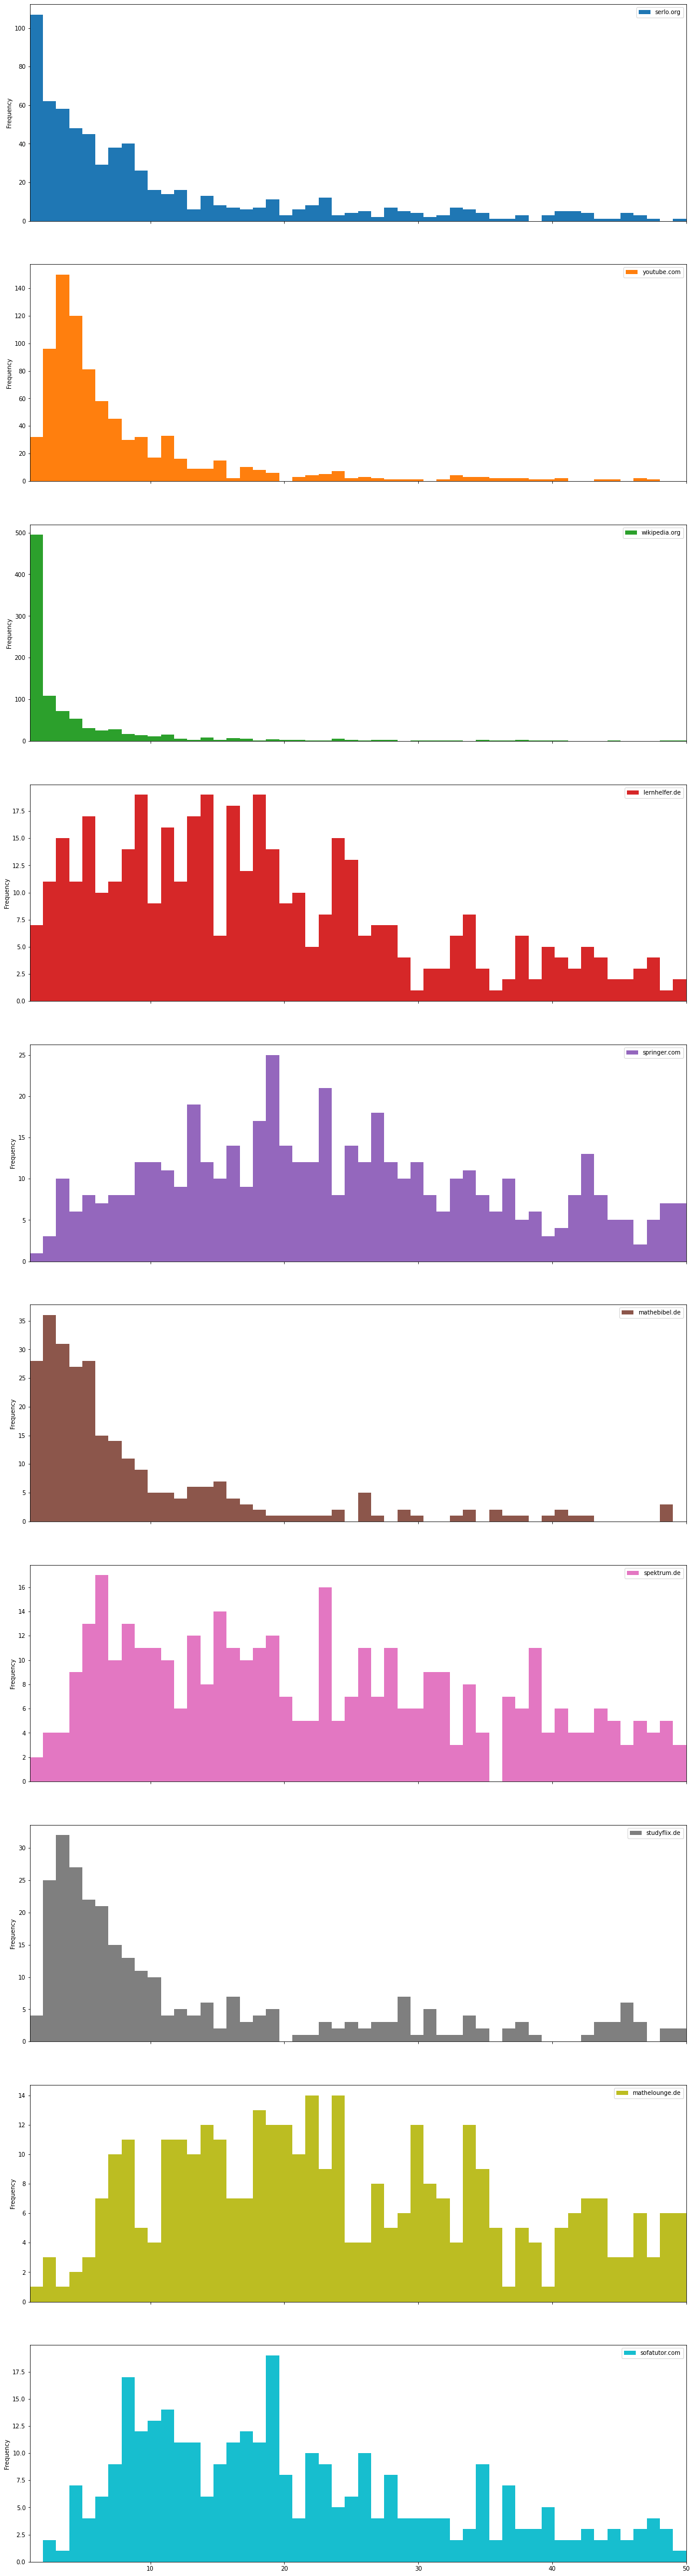

In [109]:
import json
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display, Markdown

with open("../keywords.json", "r") as fd:
    all_keyword_entries = json.load(fd)

def analyse(query={}, analysed_domains=["serlo.org"],
            compare_domains=None, blacklist=[], no_domains=6):
    def is_in_query(entry):
        return all((entry[key] == value for key, value in query.items()))
    
    keyword_entries = [k for k in all_keyword_entries if is_in_query(k)]
    keywords = [entry["keyword"] for entry in keyword_entries if read_lastest_result(entry["keyword"]) != None]
    keywords = list(set(keywords))
    
    compare_domains_orig = compare_domains
    
    if compare_domains == None:    
        compare_domains = get_best_domains(keywords, blacklist=analysed_domains + blacklist,
                                           no_domains = no_domains)
    
    domains = analysed_domains + compare_domains
    
    read_ranking = lambda keyword: [keyword] + [get_best_ranking(keyword, domain) for domain in domains]
        
    df = pd.DataFrame(map(read_ranking, keywords), columns=["keyword"] + domains)
    df.set_index("keyword", inplace=True)
    
    if len(query) > 0:
        query_title = "(" + ", ".join(("%s: %s" % x for x in query.items())) + ")"
    else:
        query_title = "aller Suchbegriffe"
    
    display(Markdown("## Auswertung " + query_title))
    
    if "scope" not in query:
        display(Markdown("Die Ergebnisse umfassen sowohl den Schulbereich auf serlo.org als auch Ergebnisse vom Hochschulbereich auf wikibooks.org. Ergebnisse beider Seiten werden mit 'serlo.org' angegeben."))
    
    display(Markdown("Auswertung für folgende Webseiten:"))
    display_list(analysed_domains)
    
    if compare_domains_orig:
        display(Markdown("Zum Vergleich werden auch die Ergebnisse der folgenden Webseiten angezeigt:"))
        display_list(domains)
    elif no_domains > 0:
        display(Markdown("Zum Vergleich werden die besten %s weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:" % no_domains))
        display_list(compare_domains)
        
        if blacklist:
            display(Markdown("Bei der Analyse der weiteren Webseiten wurde ausgeschlossen"))
            display_list(blacklist)
    
    display(Markdown("### Tabelle"))
    display(df.head())
    
    display(Markdown("### Deskriptive Auswertung"))
    display(df.describe())
    
    display(Markdown("### Historgramme"))
    maxRank = int(df.max().max())
    df.plot.hist(figsize=(20, 8 * len(df.columns)), xlim=(1,maxRank),
                 bins=maxRank, subplots=True)
    plt.show()

def display_list(entries):
    display(Markdown("\n".join(("* " + e for e in entries))))

def get_best_ranking(keyword, domain):
    for index, entry in enumerate(read_latest_result(keyword)):
        if urlparse(entry["link"]).hostname.endswith(domain):
            return entry["page"]*10 + entry["index"] + 1

    return None
    
    
analyse(no_domains=9)

# Auswertung nach Fach

## Auswertung (subject: Nachhaltigkeit)

Die Ergebnisse umfassen sowohl den Schulbereich auf serlo.org als auch Ergebnisse vom Hochschulbereich auf wikibooks.org. Ergebnisse beider Seiten werden mit 'serlo.org' angegeben.

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 5 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

* youtube.com
* mein-schoener-garten.de
* pinterest.de
* amazon.de
* ndr.de

Bei der Analyse der weiteren Webseiten wurde ausgeschlossen

* wikipedia.org
* wiktionary.org

### Tabelle

,serlo.org,youtube.com,mein-schoener-garten.de,pinterest.de,amazon.de,ndr.de
keyword,,,,,,
düngung,33.0,11.0,14.0,NaN,NaN,16.0
sortenvielfalt,3.0,NaN,NaN,13.0,35.0,12.0
möglichkeiten plastikverwertung,1.0,11.0,NaN,10.0,NaN,NaN
fruchtfolge,29.0,25.0,1.0,NaN,40.0,8.0
plastikalternativen,14.0,NaN,NaN,18.0,NaN,NaN


### Deskriptive Auswertung

,serlo.org,youtube.com,mein-schoener-garten.de,pinterest.de,amazon.de,ndr.de
count,47.000000,37.000000,30.000000,33.000000,38.000000,19.000000
mean,12.638298,12.810811,11.366667,21.636364,23.131579,18.578947
std,12.761057,8.672555,13.044971,12.295371,15.418786,13.985372
min,1.000000,4.000000,1.000000,2.000000,1.000000,5.000000
25%,1.500000,7.000000,3.000000,13.000000,9.000000,8.000000
50%,8.000000,10.000000,4.500000,20.000000,20.500000,12.000000
75%,22.500000,15.000000,13.500000,28.000000,35.000000,23.000000
max,47.000000,36.000000,41.000000,47.000000,49.000000,48.000000


### Historgramme

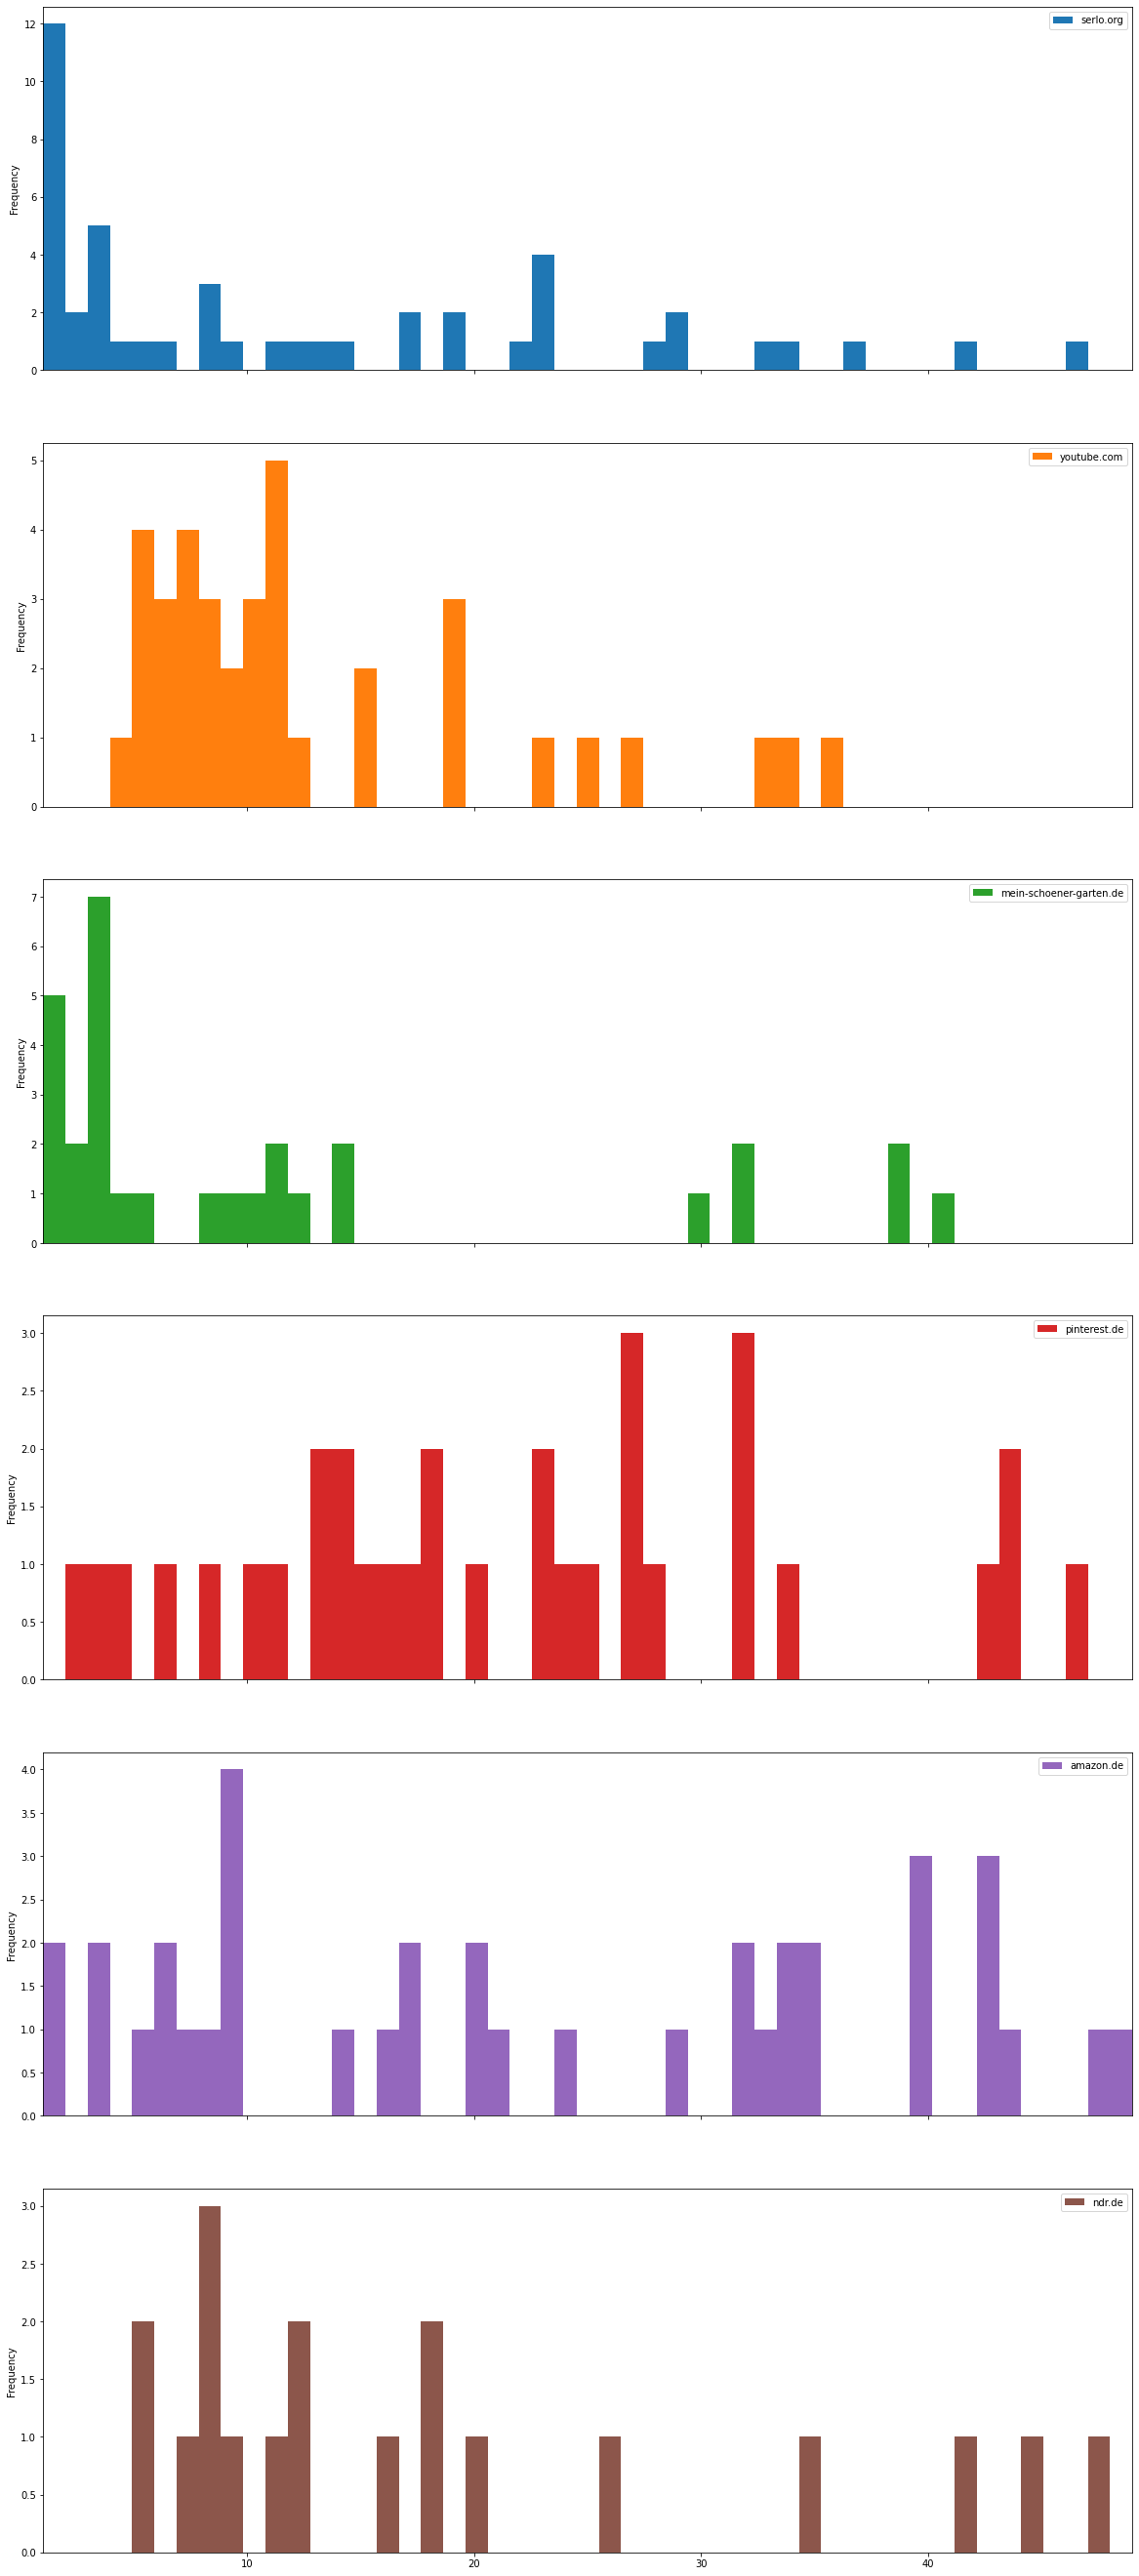

## Auswertung (subject: Wirtschaft)

Die Ergebnisse umfassen sowohl den Schulbereich auf serlo.org als auch Ergebnisse vom Hochschulbereich auf wikibooks.org. Ergebnisse beider Seiten werden mit 'serlo.org' angegeben.

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 5 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

* youtube.com
* gabler.de
* debitoor.de
* sevdesk.de
* billomat.com

Bei der Analyse der weiteren Webseiten wurde ausgeschlossen

* wikipedia.org
* wiktionary.org

### Tabelle

,serlo.org,youtube.com,gabler.de,debitoor.de,sevdesk.de,billomat.com
keyword,,,,,,
kontenplan kontenrahmen,41.0,24.0,36.0,11.0,9.0,50.0
betrieb,31.0,15.0,2.0,NaN,NaN,NaN
skonto,NaN,18.0,49.0,2.0,5.0,9.0
gewinn verlust,46.0,3.0,5.0,1.0,10.0,38.0
angebot nachfrage,7.0,NaN,NaN,NaN,NaN,NaN


### Deskriptive Auswertung

,serlo.org,youtube.com,gabler.de,debitoor.de,sevdesk.de,billomat.com
count,5.000000,16.000000,17.000000,11.000000,10.000000,11.000000
mean,33.400000,13.625000,17.588235,7.545455,8.700000,17.272727
std,15.757538,8.196544,14.870520,12.069496,3.497618,16.230163
min,7.000000,3.000000,2.000000,1.000000,5.000000,3.000000
25%,31.000000,7.500000,4.000000,2.000000,6.250000,6.500000
50%,41.000000,11.500000,14.000000,4.000000,9.000000,9.000000
75%,42.000000,19.000000,33.000000,5.000000,9.750000,26.000000
max,46.000000,30.000000,49.000000,43.000000,17.000000,50.000000


### Historgramme

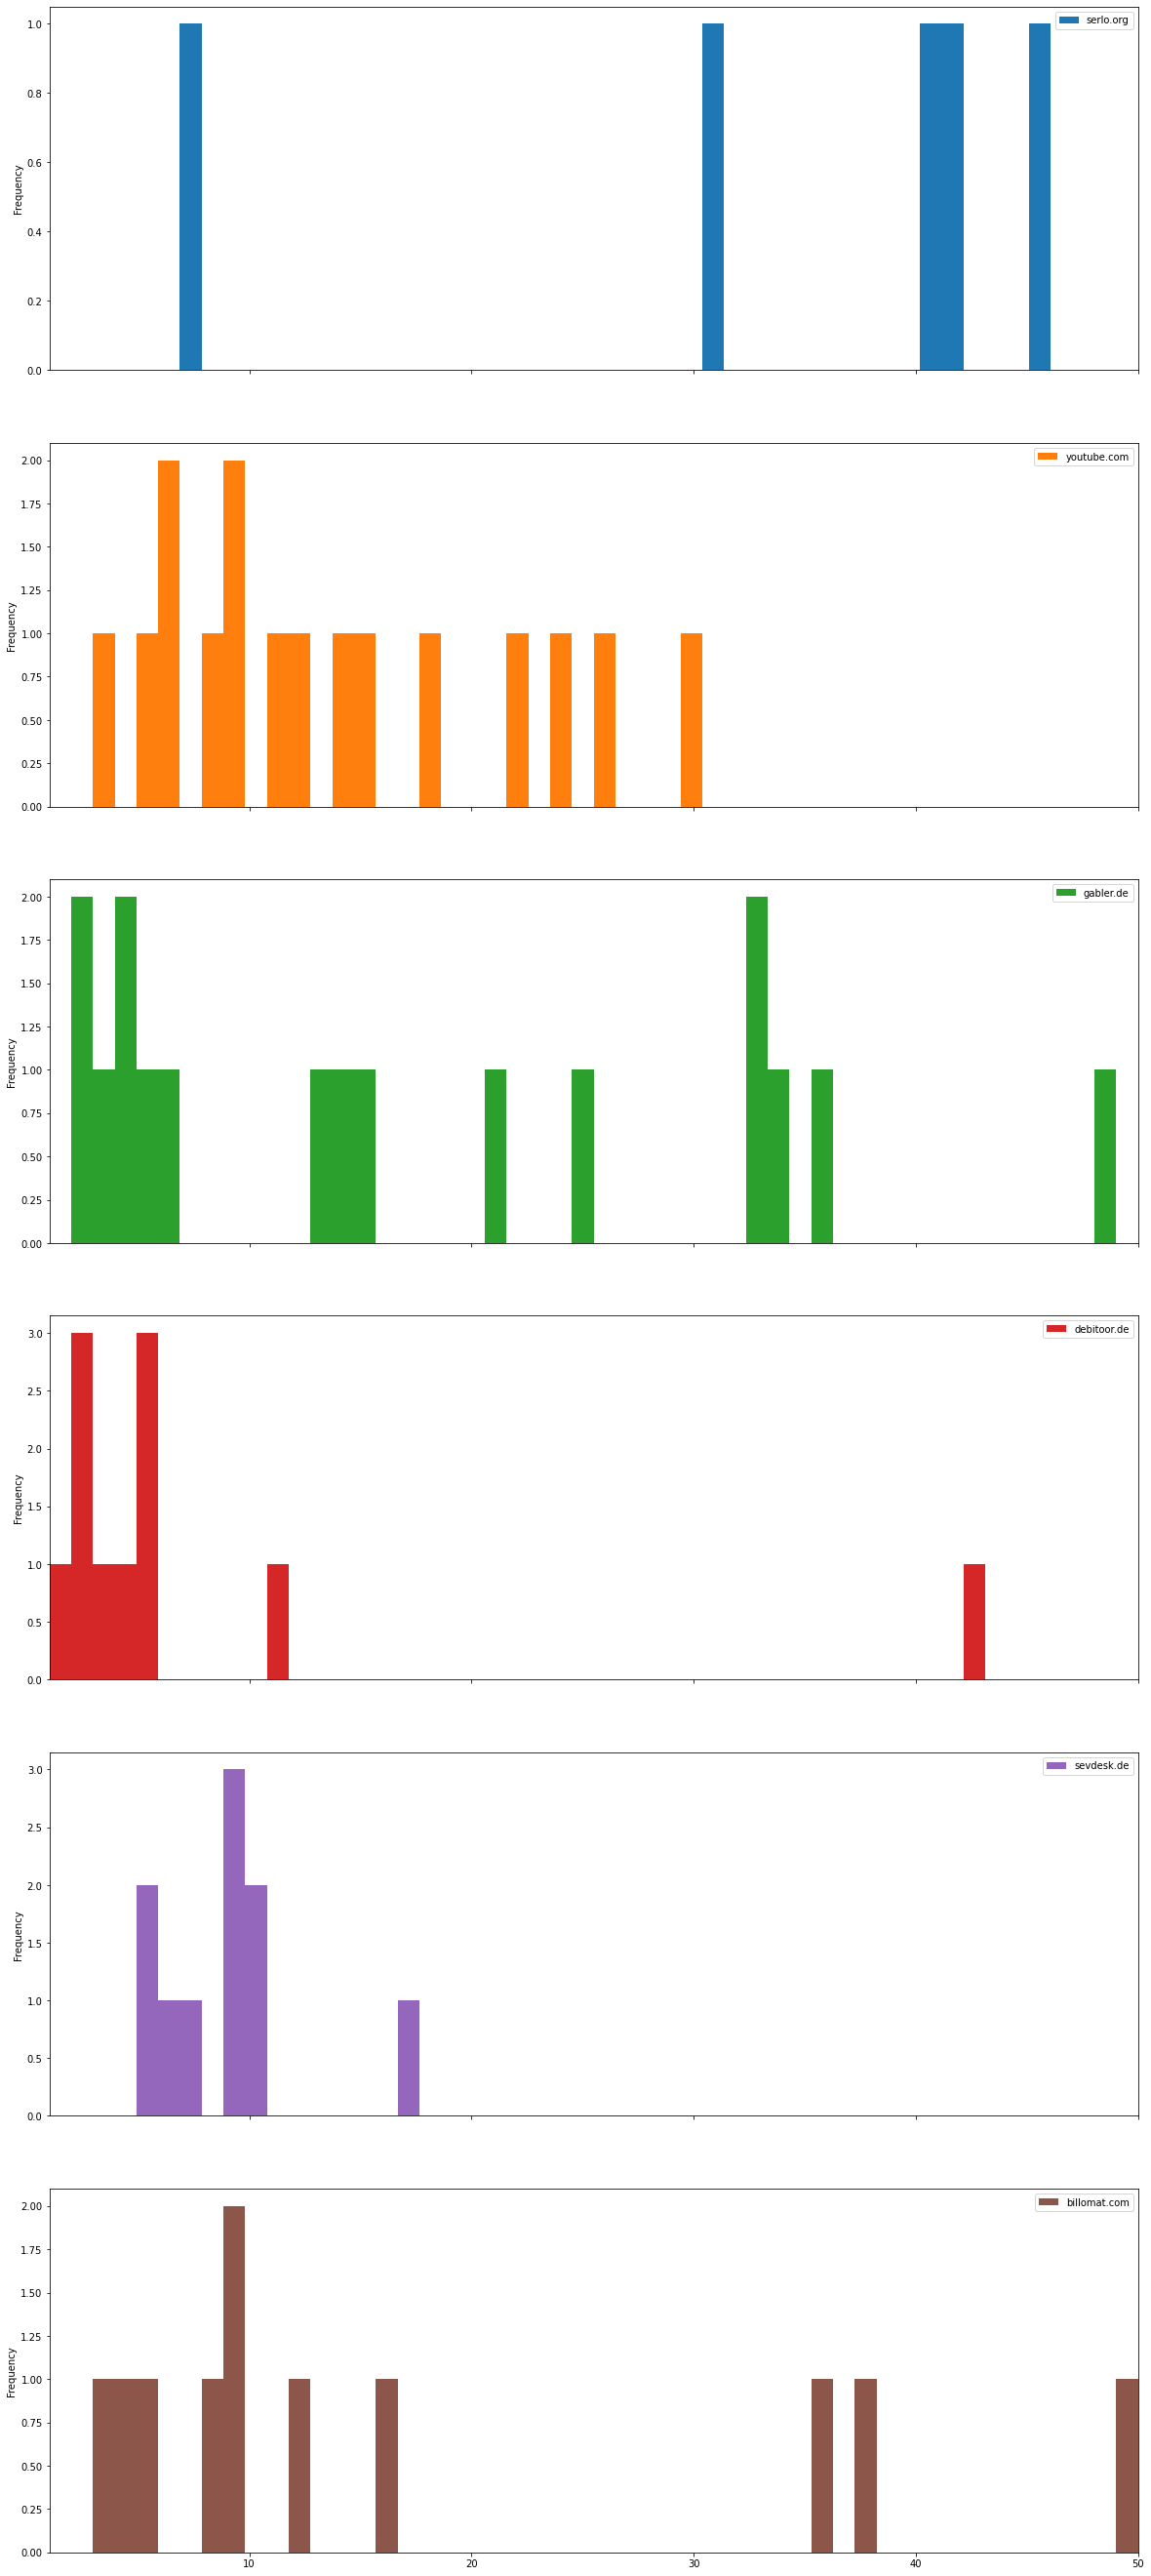

## Auswertung (subject: Chemie)

Die Ergebnisse umfassen sowohl den Schulbereich auf serlo.org als auch Ergebnisse vom Hochschulbereich auf wikibooks.org. Ergebnisse beider Seiten werden mit 'serlo.org' angegeben.

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 5 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

* youtube.com
* chemie.de
* chemgapedia.de
* lernhelfer.de
* spektrum.de

Bei der Analyse der weiteren Webseiten wurde ausgeschlossen

* wikipedia.org
* wiktionary.org

### Tabelle

,serlo.org,youtube.com,chemie.de,chemgapedia.de,lernhelfer.de,spektrum.de
keyword,,,,,,
molekülmasse,13.0,3.0,2.0,43.0,11.0,10.0
isomerie,12.0,4.0,6.0,16.0,3.0,19.0
schalenmodell,5.0,NaN,6.0,NaN,13.0,24.0
kettenreaktion,NaN,7.0,3.0,13.0,25.0,19.0
halogene,NaN,3.0,5.0,6.0,1.0,13.0


### Deskriptive Auswertung

,serlo.org,youtube.com,chemie.de,chemgapedia.de,lernhelfer.de,spektrum.de
count,61.000000,70.000000,81.000000,68.000000,67.000000,67.000000
mean,16.081967,6.114286,5.209877,14.720588,12.970149,16.970149
std,12.709963,5.762303,7.434238,9.707430,10.644347,10.970995
min,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000
25%,6.000000,3.000000,2.000000,7.750000,4.500000,9.000000
50%,12.000000,4.000000,3.000000,12.500000,11.000000,14.000000
75%,23.000000,7.000000,5.000000,18.250000,17.500000,23.000000
max,47.000000,36.000000,46.000000,44.000000,43.000000,50.000000


### Historgramme

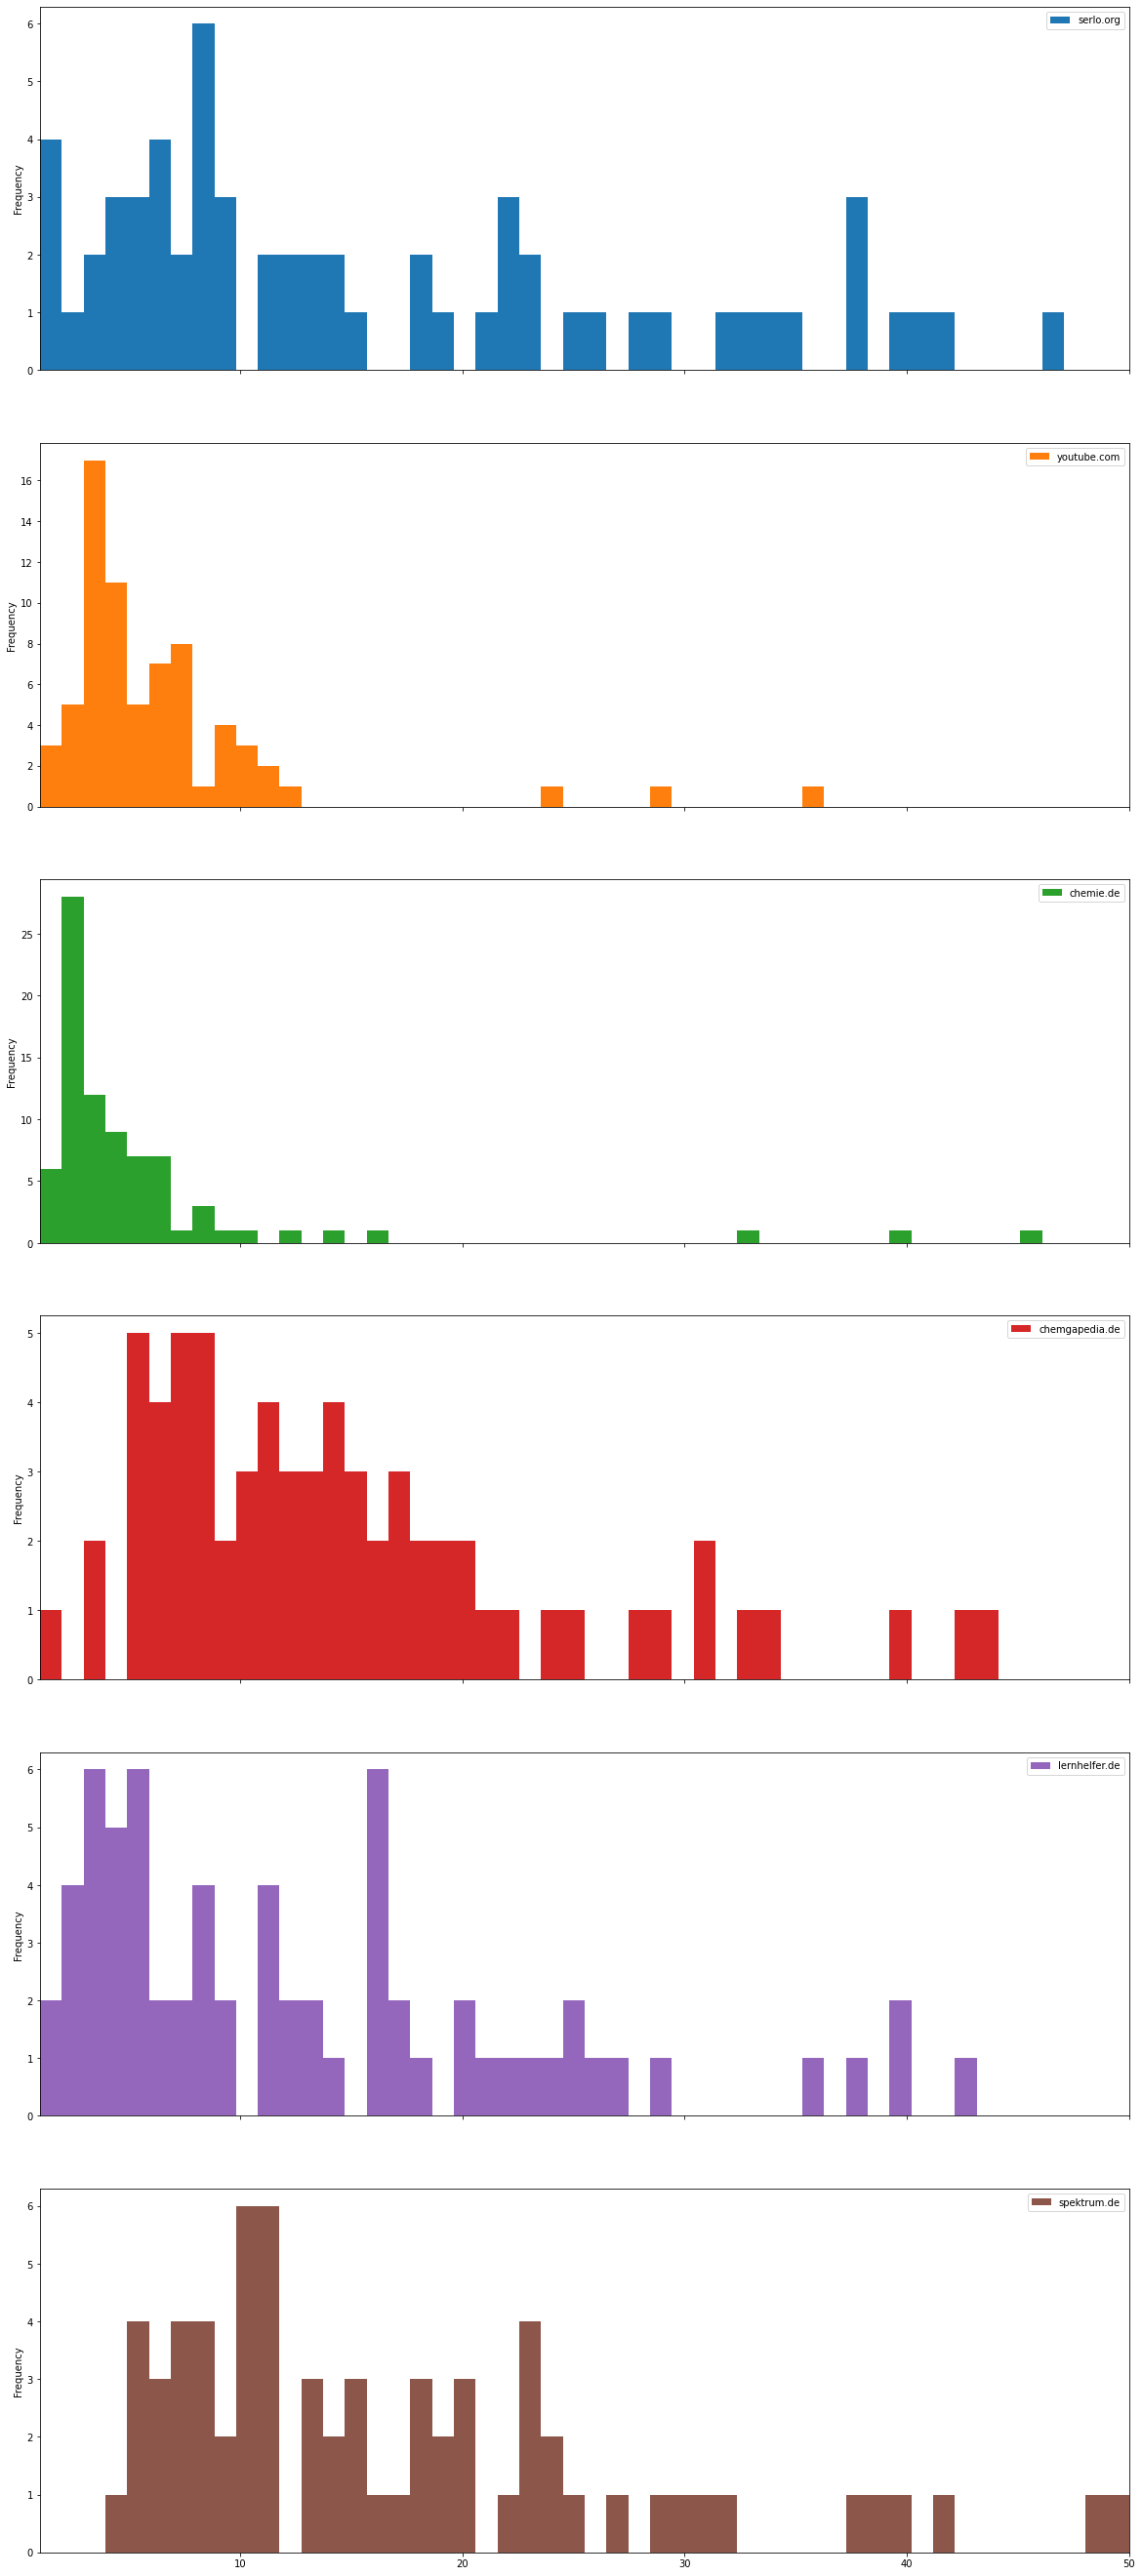

## Auswertung (subject: Biologie)

Die Ergebnisse umfassen sowohl den Schulbereich auf serlo.org als auch Ergebnisse vom Hochschulbereich auf wikibooks.org. Ergebnisse beider Seiten werden mit 'serlo.org' angegeben.

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 5 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

* youtube.com
* spektrum.de
* doccheck.com
* springer.com
* lernhelfer.de

Bei der Analyse der weiteren Webseiten wurde ausgeschlossen

* wikipedia.org
* wiktionary.org

### Tabelle

,serlo.org,youtube.com,spektrum.de,doccheck.com,springer.com,lernhelfer.de
keyword,,,,,,
erstellt diagramm,4.0,5.0,NaN,NaN,NaN,NaN
rauschmittel,7.0,NaN,NaN,NaN,NaN,NaN
ruhepotential,9.0,2.0,13.0,7.0,21.0,NaN
rekombination,12.0,4.0,6.0,9.0,21.0,49.0
leber,NaN,19.0,NaN,5.0,NaN,NaN


### Deskriptive Auswertung

,serlo.org,youtube.com,spektrum.de,doccheck.com,springer.com,lernhelfer.de
count,60.000000,55.000000,46.000000,42.000000,40.000000,34.000000
mean,9.050000,12.454545,13.347826,11.690476,20.900000,20.970588
std,9.292652,10.971036,9.051009,10.465945,11.132765,13.251610
min,1.000000,1.000000,4.000000,2.000000,1.000000,2.000000
25%,3.000000,5.000000,6.000000,5.250000,13.000000,9.000000
50%,6.000000,9.000000,10.500000,7.000000,19.500000,21.500000
75%,11.250000,16.000000,17.000000,16.750000,28.500000,26.000000
max,45.000000,45.000000,41.000000,45.000000,46.000000,49.000000


### Historgramme

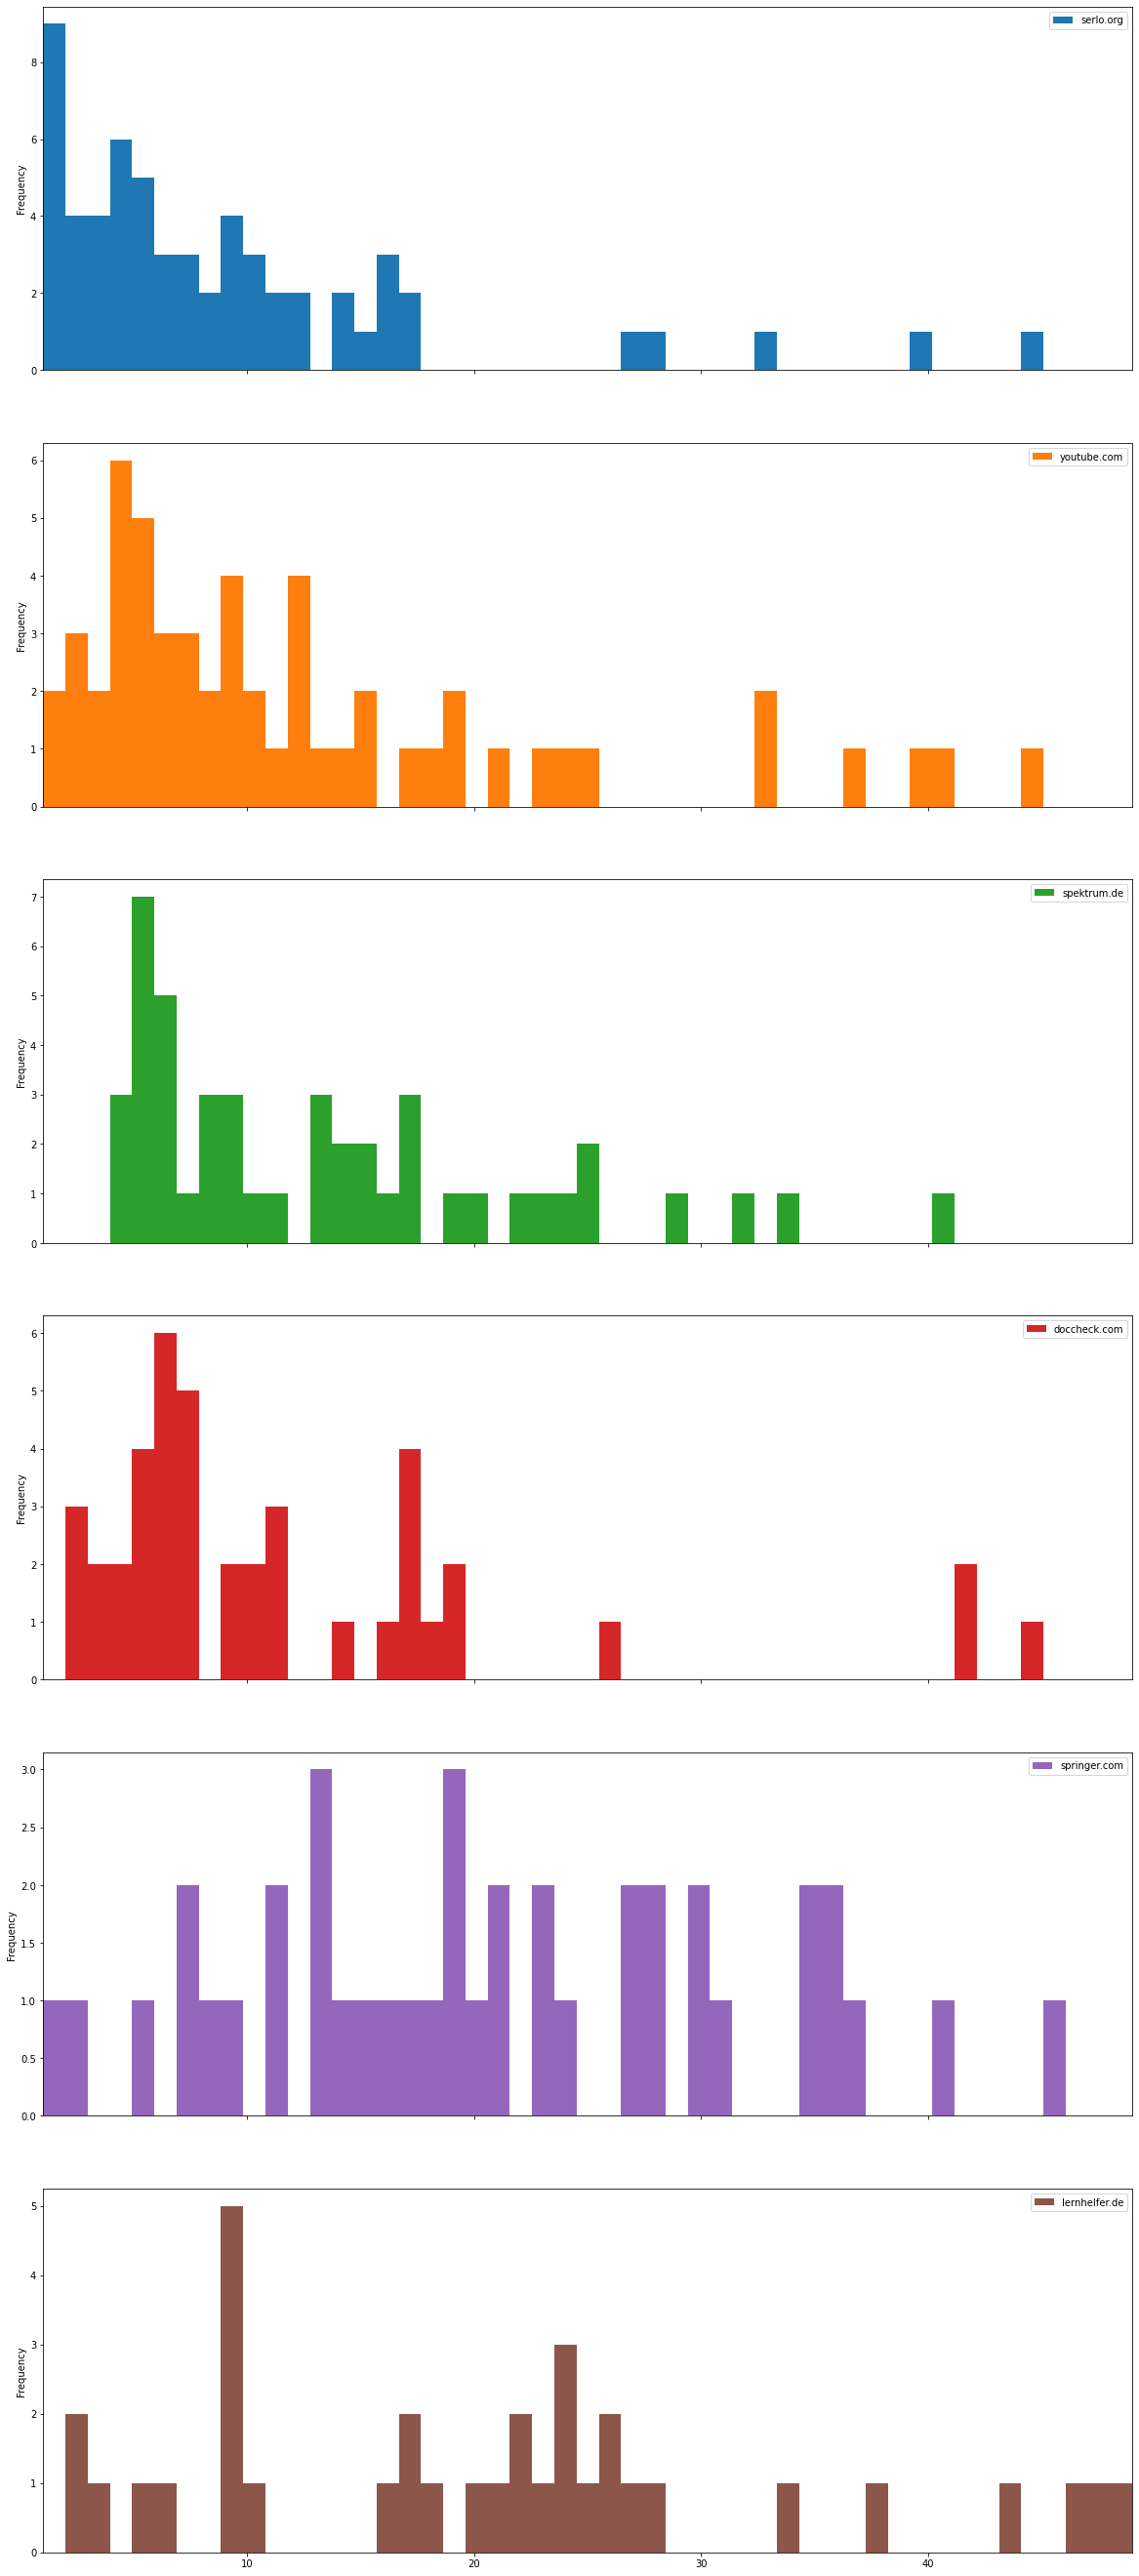

## Auswertung (subject: Mathe)

Die Ergebnisse umfassen sowohl den Schulbereich auf serlo.org als auch Ergebnisse vom Hochschulbereich auf wikibooks.org. Ergebnisse beider Seiten werden mit 'serlo.org' angegeben.

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 5 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

* youtube.com
* mathebibel.de
* mathelounge.de
* springer.com
* lernhelfer.de

Bei der Analyse der weiteren Webseiten wurde ausgeschlossen

* wikipedia.org
* wiktionary.org

### Tabelle

,serlo.org,youtube.com,mathebibel.de,mathelounge.de,springer.com,lernhelfer.de
keyword,,,,,,
bruchgleichung,8.0,1.0,4.0,NaN,NaN,19.0
geometrische summenformel,24.0,4.0,NaN,20.0,NaN,NaN
substitution,2.0,1.0,9.0,NaN,NaN,NaN
linearfaktorzerlegung durchführen,1.0,4.0,NaN,6.0,27.0,NaN
symmetrisches trapez,1.0,4.0,2.0,11.0,NaN,16.0


### Deskriptive Auswertung

,serlo.org,youtube.com,mathebibel.de,mathelounge.de,springer.com,lernhelfer.de
count,438.000000,589.000000,268.000000,344.000000,343.000000,282.000000
mean,8.974886,6.196944,8.720149,24.229651,24.122449,19.613475
std,10.399428,6.418664,9.908195,12.542738,12.456809,11.739896
min,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
25%,2.000000,3.000000,3.000000,14.000000,15.000000,11.000000
50%,5.000000,4.000000,5.000000,22.000000,23.000000,18.000000
75%,10.000000,7.000000,11.000000,34.000000,33.000000,25.750000
max,50.000000,47.000000,49.000000,50.000000,50.000000,50.000000


### Historgramme

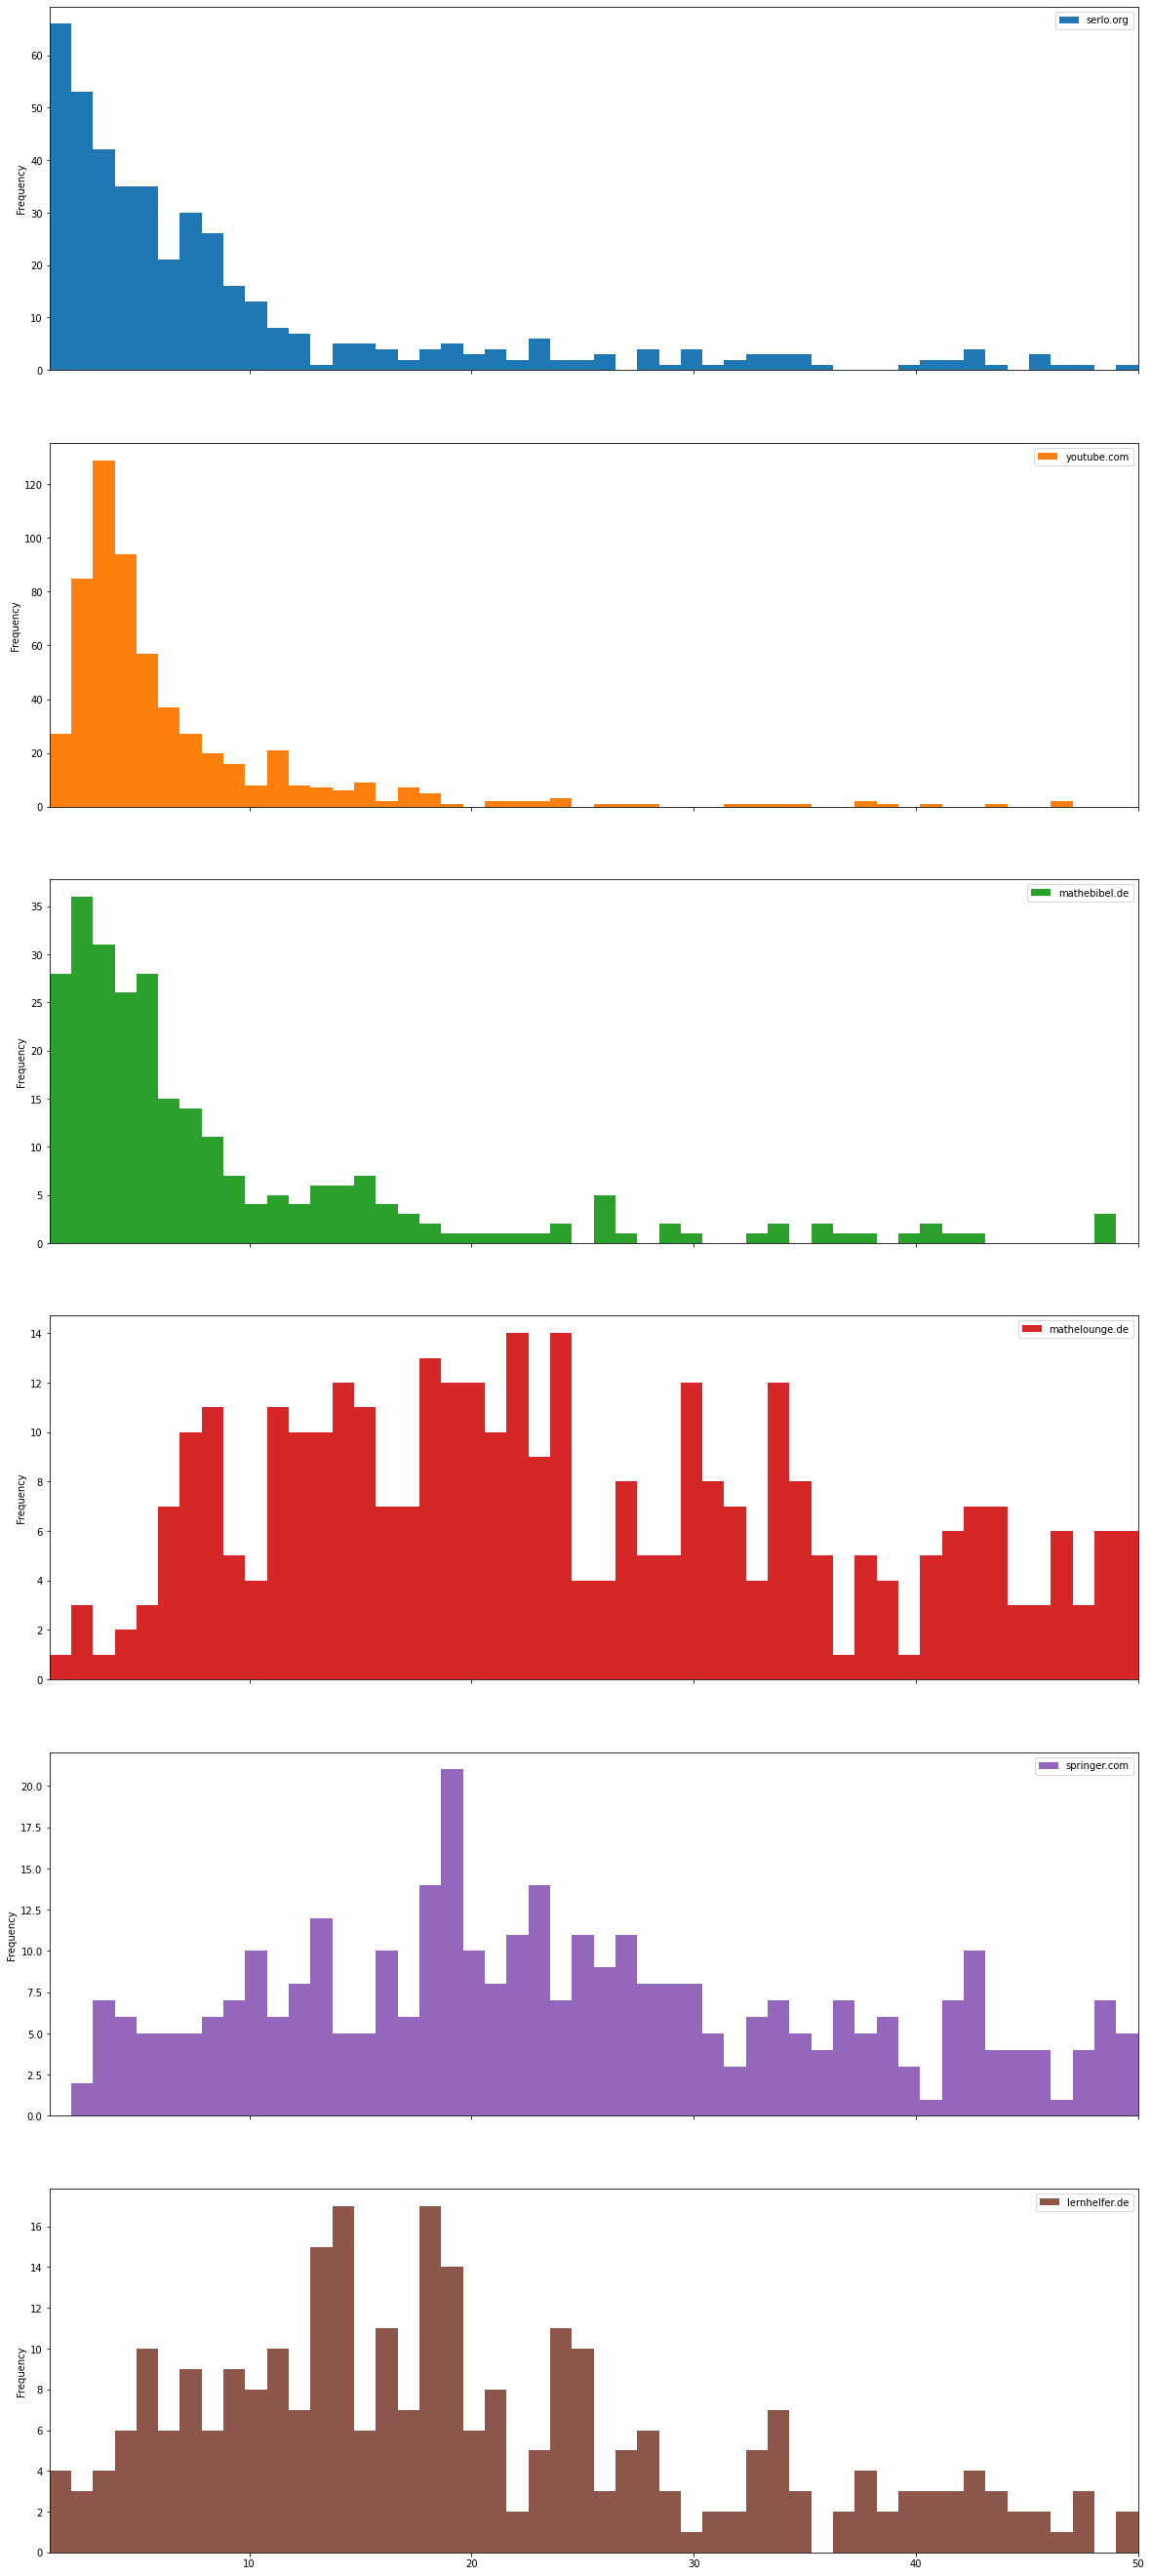

## Auswertung (subject: Physik)

Die Ergebnisse umfassen sowohl den Schulbereich auf serlo.org als auch Ergebnisse vom Hochschulbereich auf wikibooks.org. Ergebnisse beider Seiten werden mit 'serlo.org' angegeben.

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 5 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

* youtube.com
* lernhelfer.de
* leifiphysik.de
* chemie.de
* studyflix.de

Bei der Analyse der weiteren Webseiten wurde ausgeschlossen

* wikipedia.org
* wiktionary.org

### Tabelle

,serlo.org,youtube.com,lernhelfer.de,leifiphysik.de,chemie.de,studyflix.de
keyword,,,,,,
dichte,NaN,6.0,9.0,12.0,2.0,19.0
energieformen,8.0,4.0,3.0,2.0,NaN,7.0
wellencharakter elektrons,1.0,5.0,12.0,6.0,8.0,34.0
orbitaltheorie,1.0,9.0,18.0,NaN,16.0,29.0
radioaktivität,NaN,2.0,23.0,10.0,7.0,4.0


### Deskriptive Auswertung

,serlo.org,youtube.com,lernhelfer.de,leifiphysik.de,chemie.de,studyflix.de
count,15.000000,15.000000,16.00000,14.000000,14.000000,11.000000
mean,11.600000,6.600000,9.12500,6.500000,9.142857,11.454545
std,10.881176,4.762952,6.17387,5.140338,9.828194,11.129813
min,1.000000,2.000000,1.00000,1.000000,2.000000,2.000000
25%,4.000000,4.500000,3.00000,2.000000,4.250000,3.500000
50%,8.000000,5.000000,8.50000,6.000000,6.000000,7.000000
75%,17.000000,6.000000,12.25000,10.000000,8.750000,15.000000
max,34.000000,22.000000,23.00000,16.000000,41.000000,34.000000


### Historgramme

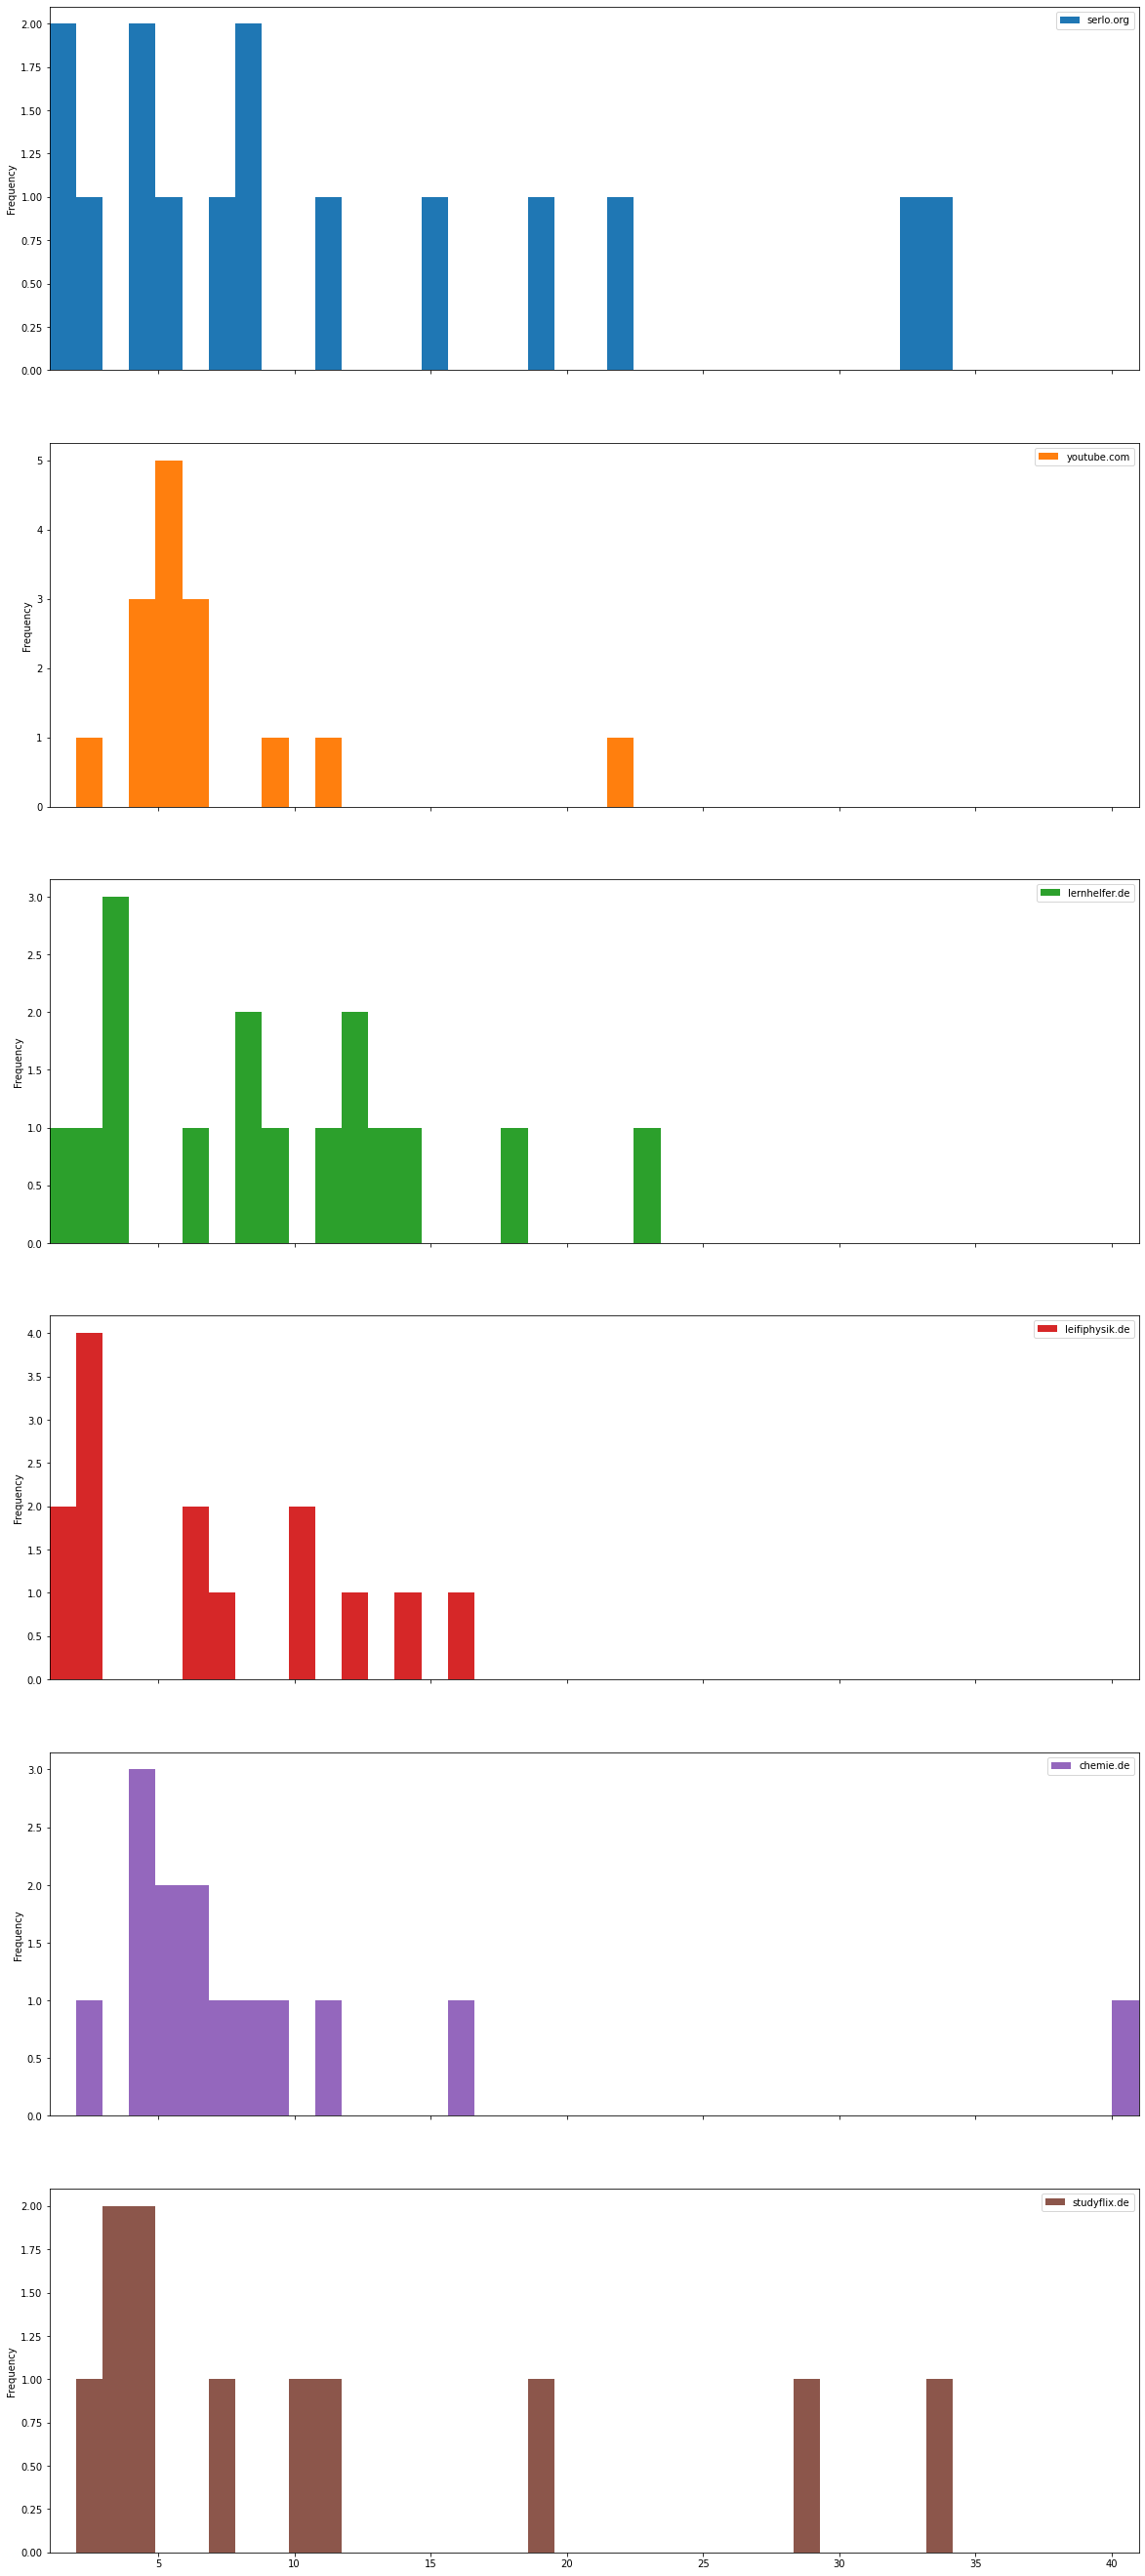

## Auswertung (subject: Geographie)

Die Ergebnisse umfassen sowohl den Schulbereich auf serlo.org als auch Ergebnisse vom Hochschulbereich auf wikibooks.org. Ergebnisse beider Seiten werden mit 'serlo.org' angegeben.

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 5 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

* youtube.com
* klett.de
* westermann.de
* spektrum.de
* regenwald-schuetzen.org

Bei der Analyse der weiteren Webseiten wurde ausgeschlossen

* wikipedia.org
* wiktionary.org

### Tabelle

,serlo.org,youtube.com,klett.de,westermann.de,spektrum.de,regenwald-schuetzen.org
keyword,,,,,,
tropischer regenwald,25.0,9.0,12.0,28.0,27.0,3.0
schalenbau erde,3.0,2.0,1.0,6.0,5.0,NaN
thermoisoplethendiagramme auswerten,1.0,NaN,4.0,16.0,19.0,NaN
plattentektonik,12.0,5.0,30.0,15.0,31.0,NaN
cluster,NaN,6.0,50.0,NaN,23.0,NaN


### Deskriptive Auswertung

,serlo.org,youtube.com,klett.de,westermann.de,spektrum.de,regenwald-schuetzen.org
count,9.000000,10.00000,9.000000,8.000000,9.000000,3.000000
mean,6.888889,7.10000,14.000000,18.750000,21.555556,4.000000
std,8.084622,4.72464,16.401219,7.304597,11.652372,3.605551
min,1.000000,2.00000,1.000000,6.000000,5.000000,1.000000
25%,1.000000,4.25000,4.000000,14.750000,18.000000,2.000000
50%,3.000000,5.50000,7.000000,19.000000,21.000000,3.000000
75%,12.000000,8.75000,17.000000,23.750000,27.000000,5.500000
max,25.000000,18.00000,50.000000,28.000000,43.000000,8.000000


### Historgramme

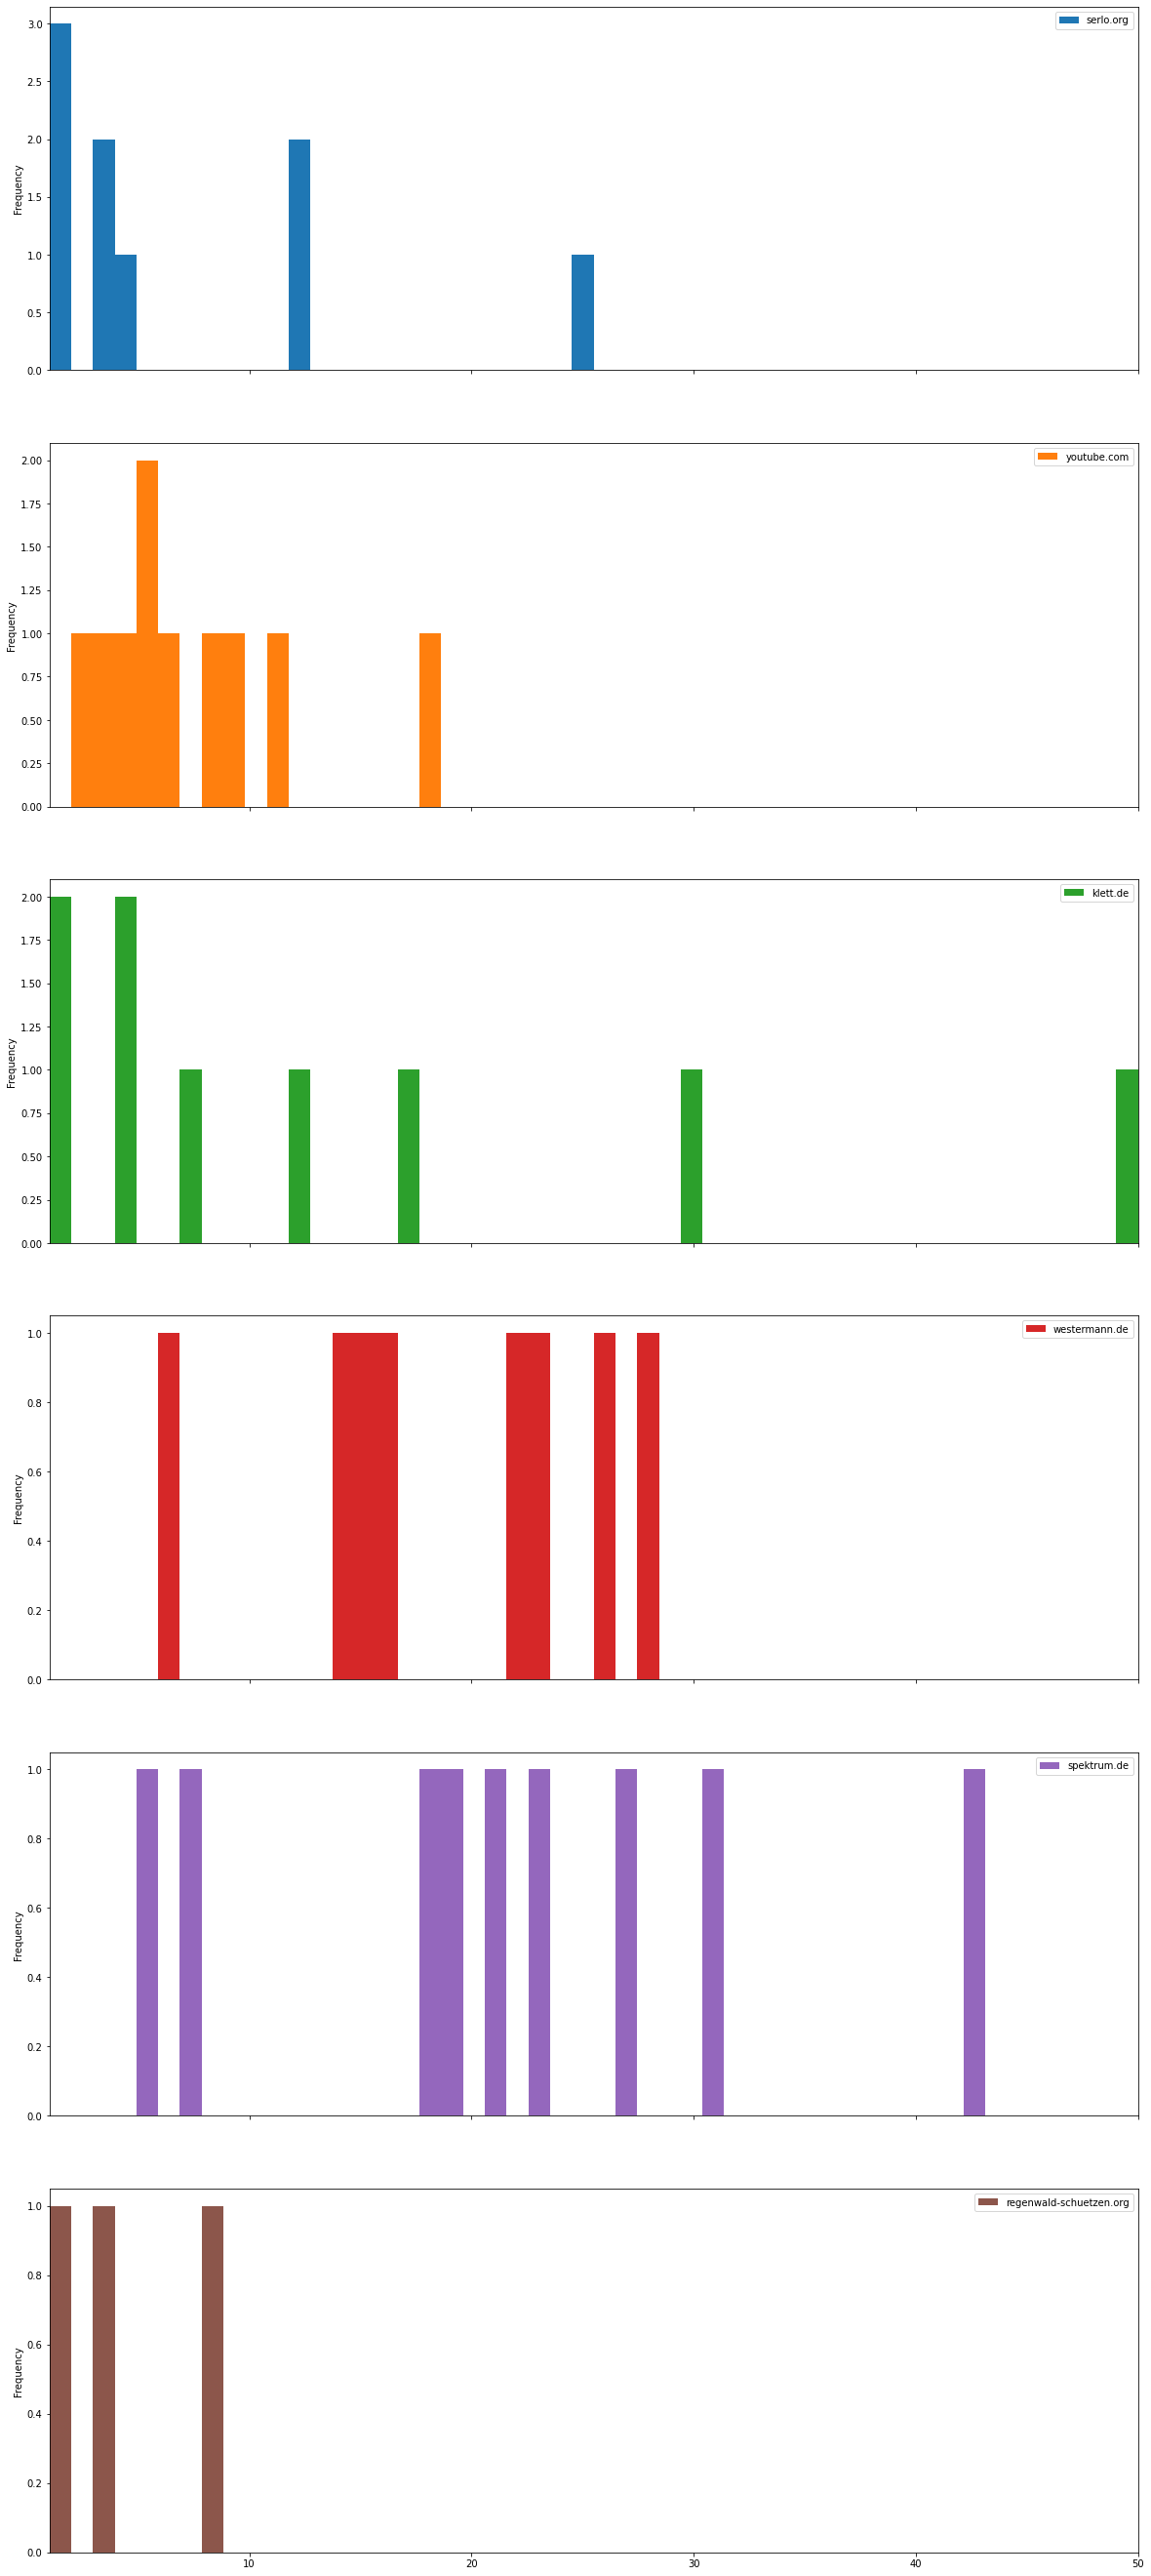

## Auswertung (subject: Informatik)

Die Ergebnisse umfassen sowohl den Schulbereich auf serlo.org als auch Ergebnisse vom Hochschulbereich auf wikibooks.org. Ergebnisse beider Seiten werden mit 'serlo.org' angegeben.

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 5 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

* youtube.com
* duden.de
* linguee.de
* microsoft.com
* gabler.de

Bei der Analyse der weiteren Webseiten wurde ausgeschlossen

* wikipedia.org
* wiktionary.org

### Tabelle

,serlo.org,youtube.com,duden.de,linguee.de,microsoft.com,gabler.de
keyword,,,,,,
array,24.0,17.0,NaN,42.0,15.0,14.0
hexadezimalsystem,6.0,2.0,50.0,NaN,NaN,NaN
einführung abfragen,9.0,35.0,NaN,NaN,1.0,NaN
alphanumerische codes,1.0,NaN,NaN,20.0,46.0,NaN
quellennachweise,12.0,NaN,17.0,19.0,NaN,NaN


### Deskriptive Auswertung

,serlo.org,youtube.com,duden.de,linguee.de,microsoft.com,gabler.de
count,45.000000,39.000000,19.000000,22.000000,19.000000,15.000000
mean,9.422222,12.769231,17.315789,26.454545,23.578947,16.866667
std,9.708218,11.517633,14.768783,11.814951,15.625178,11.716086
min,1.000000,2.000000,1.000000,10.000000,1.000000,4.000000
25%,1.000000,5.000000,3.500000,16.250000,11.500000,6.500000
50%,5.000000,8.000000,17.000000,27.500000,23.000000,14.000000
75%,14.000000,16.000000,27.000000,37.500000,39.000000,26.000000
max,41.000000,48.000000,50.000000,43.000000,46.000000,38.000000


### Historgramme

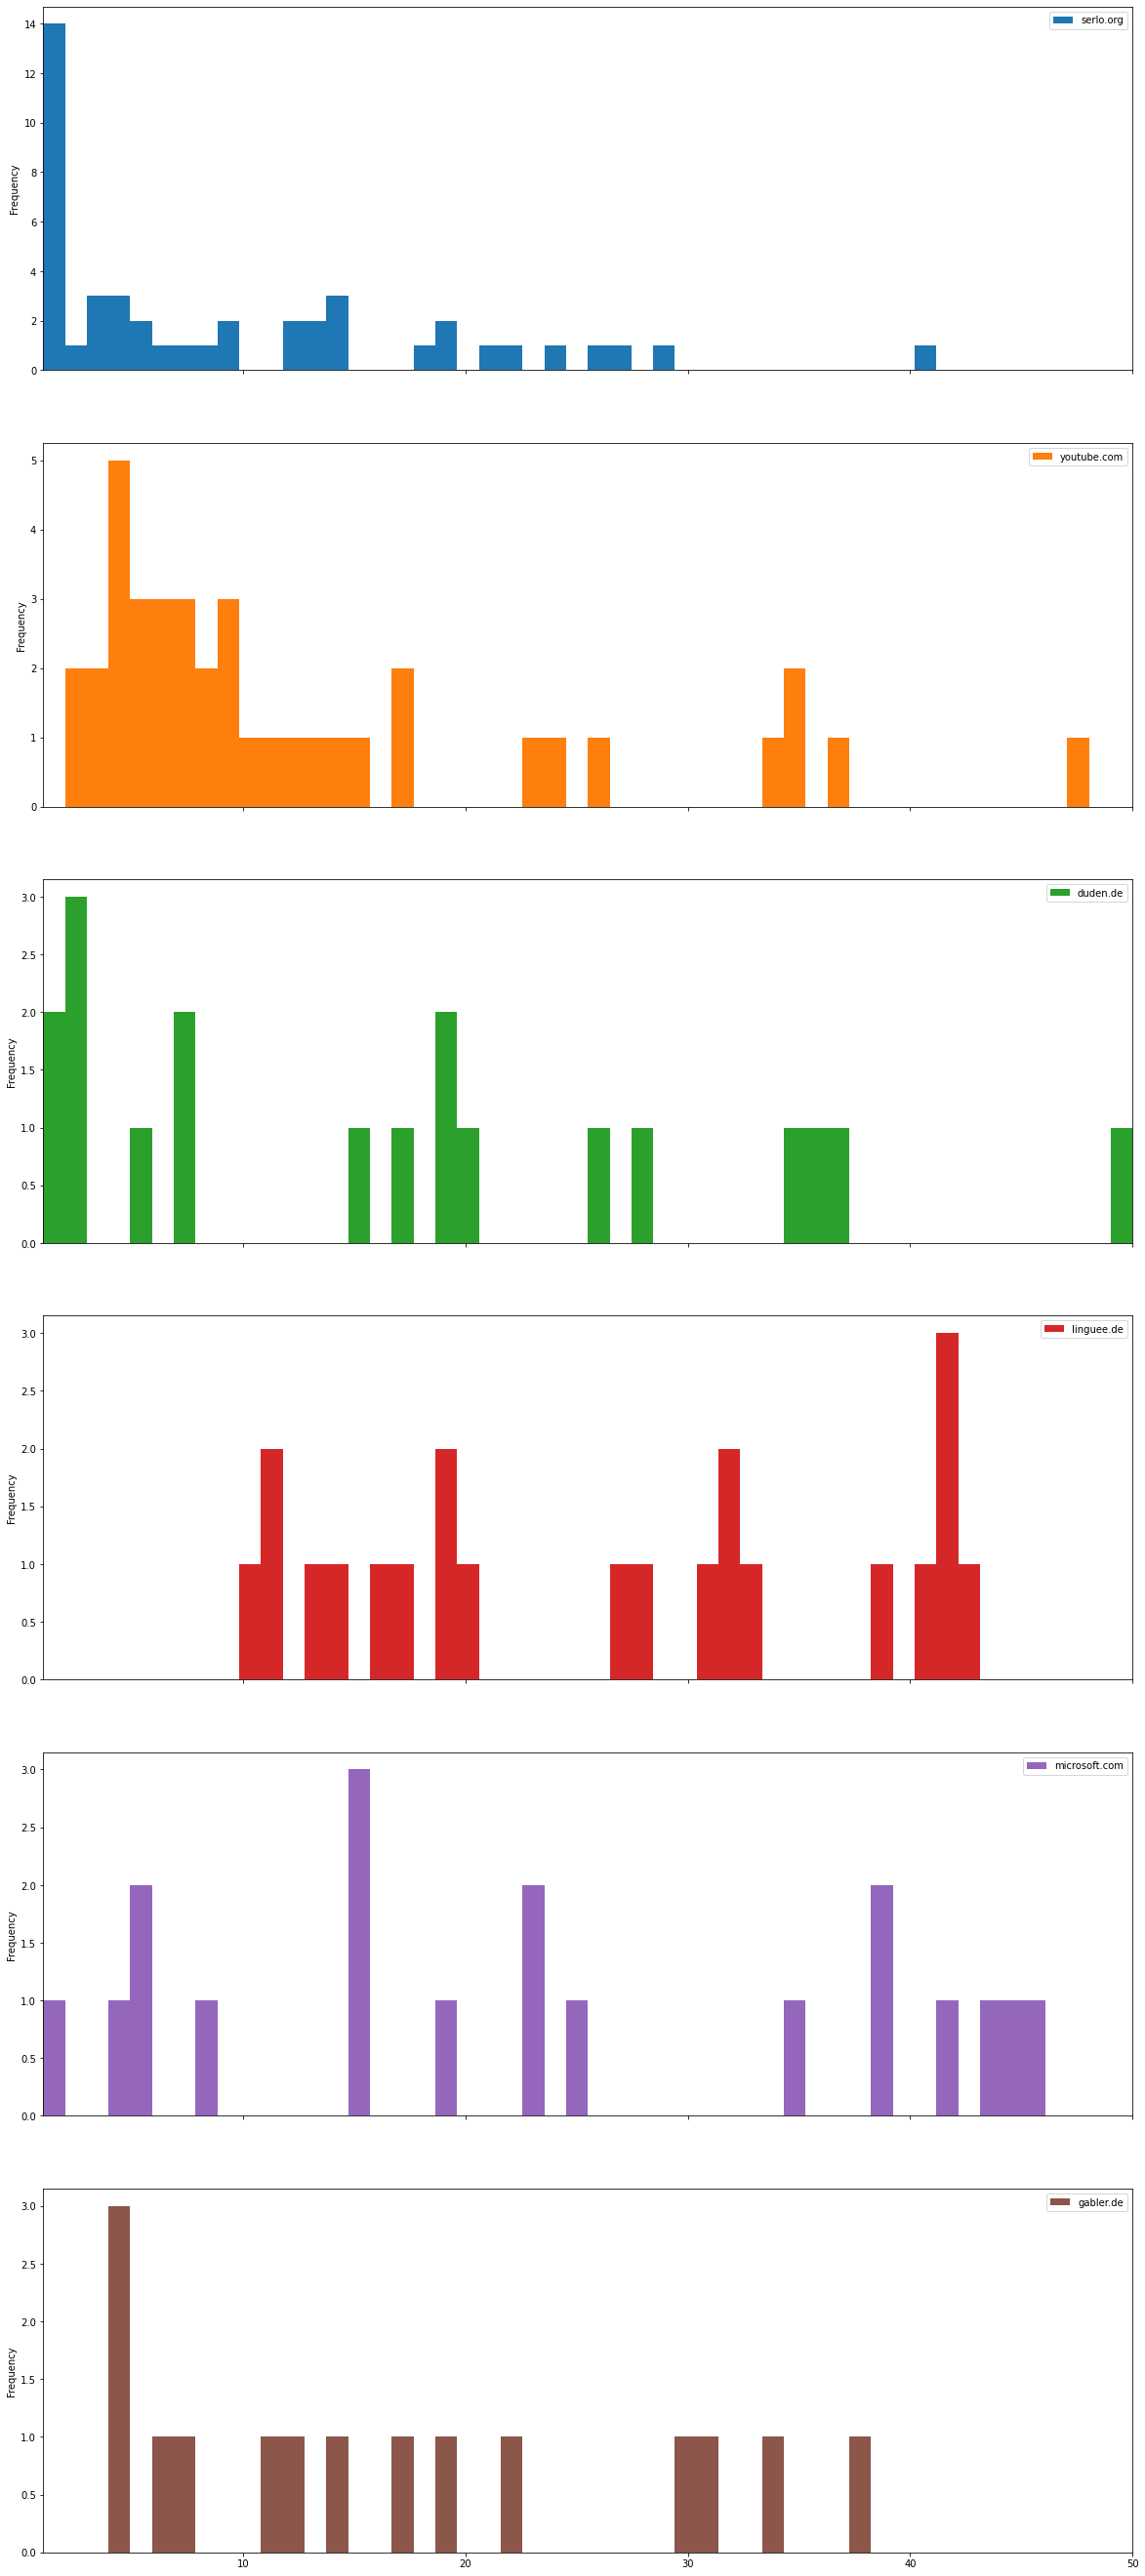

In [110]:
def get_distinct_values(prop):
    return set((entry[prop] for entry in all_keyword_entries))

for subject in get_distinct_values("subject"):
    analyse(query={"subject": subject}, blacklist=["wikipedia.org", "wiktionary.org"], no_domains=5)

## Auswertung (scope: hochschule)

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 7 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

* youtube.com
* springer.com
* mathelounge.de
* matheplanet.com
* mathepedia.de
* massmatics.de
* ac.at

Bei der Analyse der weiteren Webseiten wurde ausgeschlossen

* wikipedia.org

### Tabelle

,serlo.org,youtube.com,springer.com,mathelounge.de,matheplanet.com,mathepedia.de,massmatics.de,ac.at
keyword,,,,,,,,
geometrische summenformel,24.0,4.0,NaN,20.0,27.0,32.0,16.0,13.0
span,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
beweis infimum,2.0,3.0,NaN,5.0,9.0,7.0,21.0,NaN
aussagen negieren,NaN,3.0,45.0,2.0,24.0,NaN,NaN,NaN
reelle zahlen,10.0,4.0,31.0,NaN,NaN,46.0,37.0,NaN


### Deskriptive Auswertung

,serlo.org,youtube.com,springer.com,mathelounge.de,matheplanet.com,mathepedia.de,massmatics.de,ac.at
count,156.000000,334.000000,273.000000,213.000000,173.000000,152.000000,132.000000,134.000000
mean,14.852564,6.068862,23.153846,21.558685,23.294798,17.921053,16.757576,25.962687
std,13.291183,5.943027,12.630719,11.875636,13.231386,13.831783,13.785223,13.230977
min,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
25%,4.000000,3.000000,13.000000,13.000000,11.000000,6.750000,5.000000,14.000000
50%,9.000000,4.000000,21.000000,20.000000,20.000000,11.500000,13.500000,27.000000
75%,23.000000,7.000000,33.000000,30.000000,35.000000,28.000000,26.000000,36.000000
max,47.000000,47.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000


### Historgramme

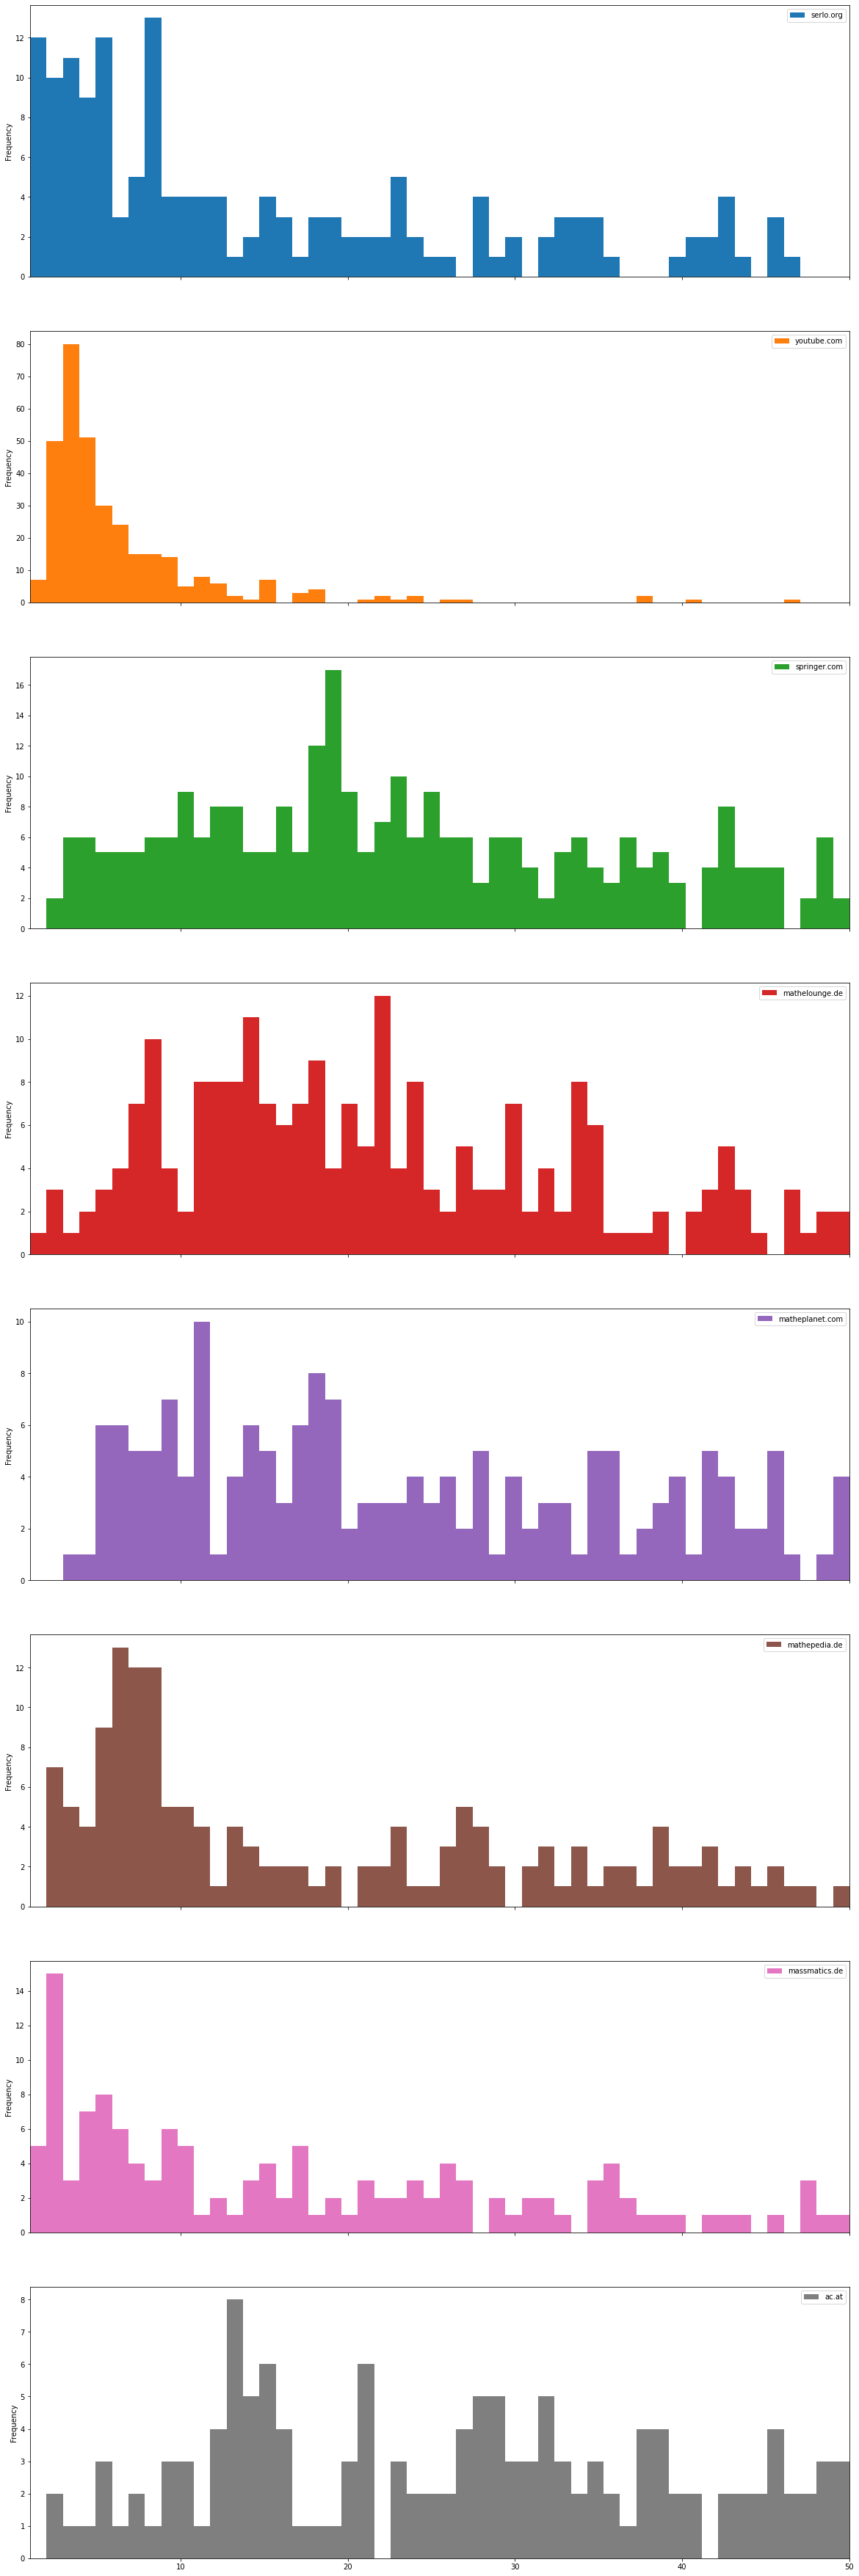

## Auswertung (scope: schule)

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 7 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

* youtube.com
* lernhelfer.de
* mathebibel.de
* sofatutor.com
* studyflix.de
* spektrum.de
* learnattack.de

Bei der Analyse der weiteren Webseiten wurde ausgeschlossen

* wikipedia.org

### Tabelle

,serlo.org,youtube.com,lernhelfer.de,mathebibel.de,sofatutor.com,studyflix.de,spektrum.de,learnattack.de
keyword,,,,,,,,
molekülmasse,13.0,3.0,11.0,NaN,NaN,16.0,10.0,9.0
bruchgleichung,8.0,1.0,19.0,4.0,36.0,43.0,NaN,24.0
substitution,2.0,1.0,NaN,9.0,NaN,50.0,46.0,NaN
halogene,NaN,3.0,1.0,NaN,15.0,4.0,13.0,34.0
linearfaktorzerlegung durchführen,1.0,4.0,NaN,NaN,NaN,2.0,NaN,NaN


### Deskriptive Auswertung

,serlo.org,youtube.com,lernhelfer.de,mathebibel.de,sofatutor.com,studyflix.de,spektrum.de,learnattack.de
count,534.000000,507.000000,311.000000,201.000000,260.000000,216.000000,257.000000,223.000000
mean,8.765918,8.149901,17.565916,8.283582,20.676923,12.277778,22.241245,19.295964
std,9.891128,8.318108,11.664448,8.909780,11.637521,12.984308,13.421508,11.508412
min,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000
25%,2.000000,3.000000,9.000000,3.000000,11.000000,4.000000,10.000000,10.000000
50%,5.000000,5.000000,16.000000,5.000000,19.000000,6.000000,20.000000,16.000000
75%,10.000000,10.000000,24.000000,9.000000,28.000000,16.000000,32.000000,28.000000
max,50.000000,48.000000,49.000000,49.000000,49.000000,50.000000,50.000000,49.000000


### Historgramme

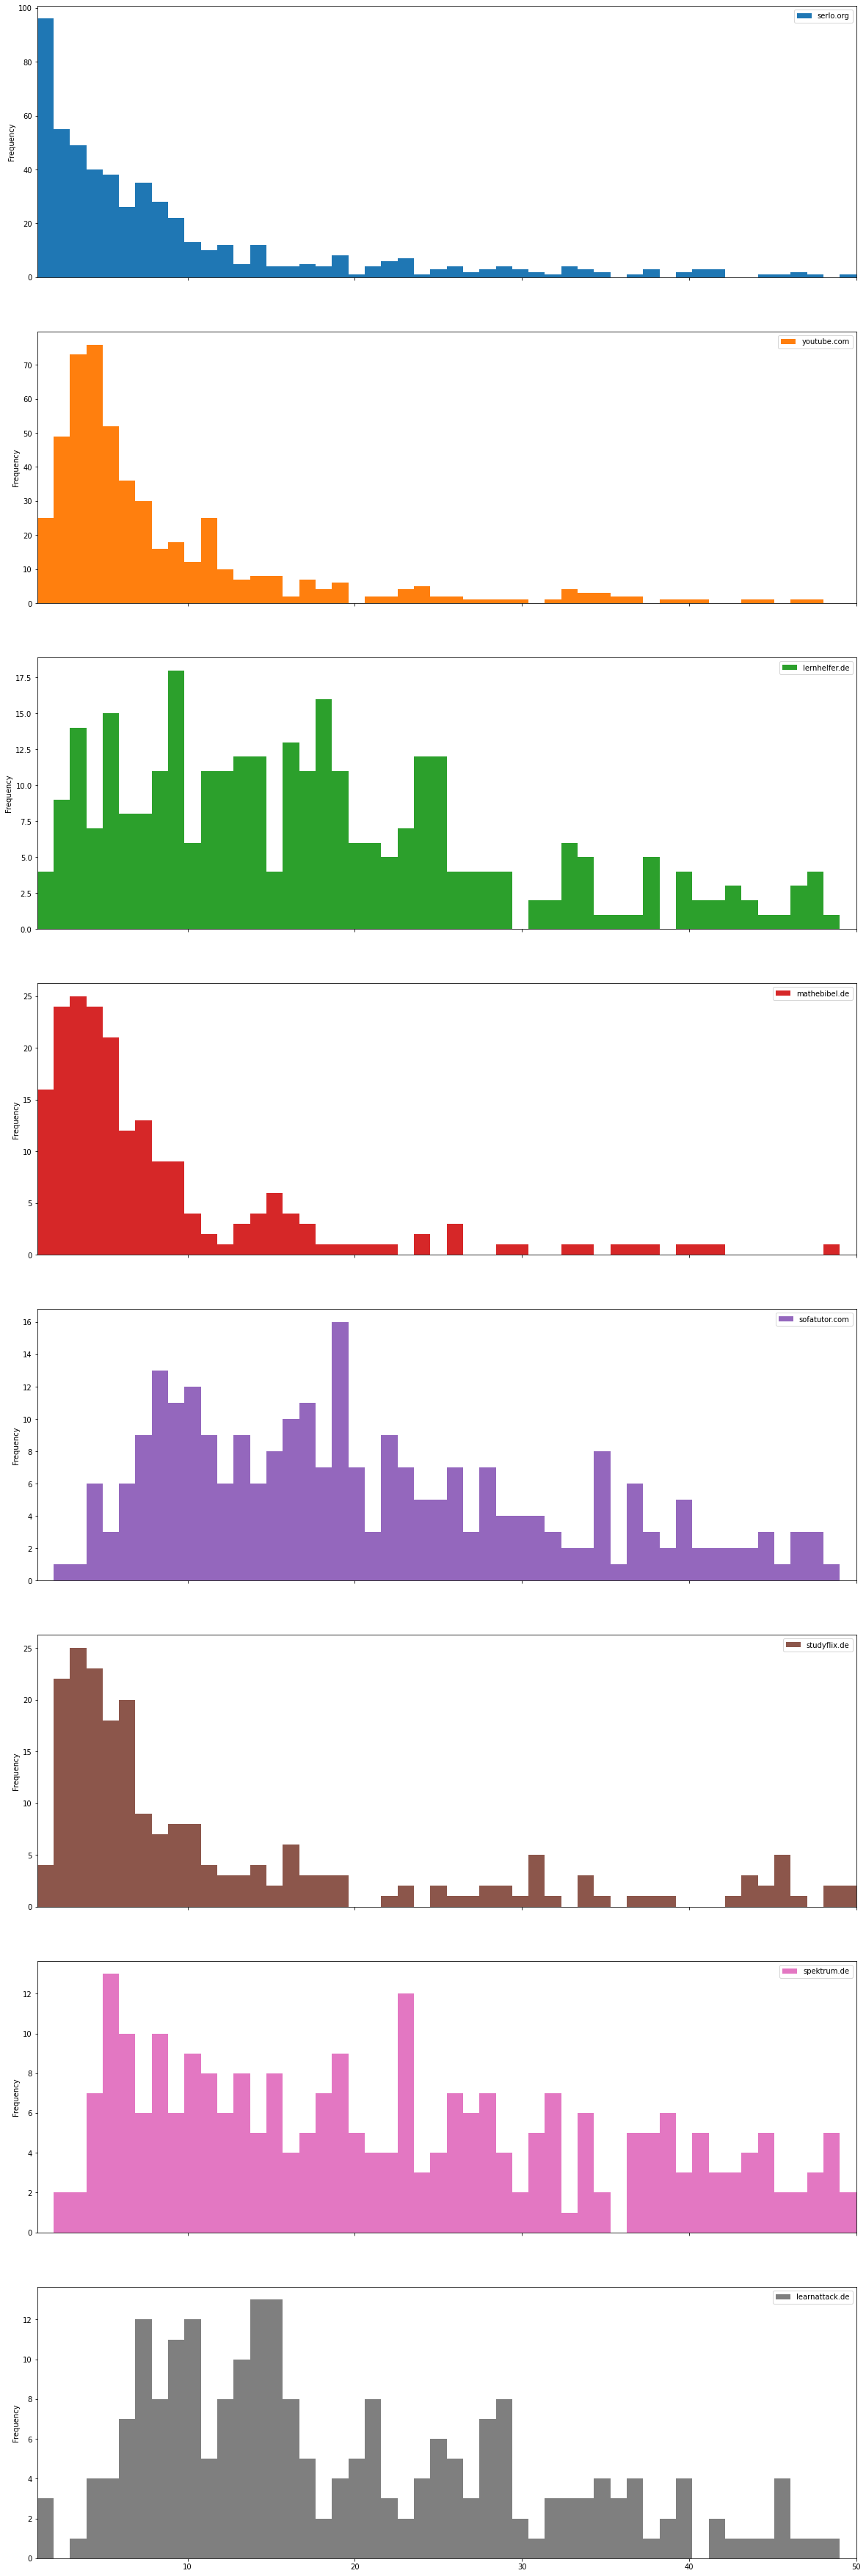

In [111]:
def get_distinct_values(prop):
    return set((entry[prop] for entry in all_keyword_entries))

for scope in get_distinct_values("scope"):
    analyse(query={"scope": scope}, blacklist=["wikipedia.org"], no_domains=7)

# Auswertung: Hochschulbereich Deutsch

## Auswertung (scope: hochschule, language: de)

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 7 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

* youtube.com
* springer.com
* mathelounge.de
* matheplanet.com
* mathepedia.de
* massmatics.de
* ac.at

Bei der Analyse der weiteren Webseiten wurde ausgeschlossen

* wikipedia.org

### Tabelle

,serlo.org,youtube.com,springer.com,mathelounge.de,matheplanet.com,mathepedia.de,massmatics.de,ac.at
keyword,,,,,,,,
geometrische summenformel,24.0,4.0,NaN,20.0,27.0,32.0,16.0,13.0
span,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
beweis infimum,2.0,3.0,NaN,5.0,9.0,7.0,21.0,NaN
aussagen negieren,NaN,3.0,45.0,2.0,24.0,NaN,NaN,NaN
reelle zahlen,10.0,4.0,31.0,NaN,NaN,46.0,37.0,NaN


### Deskriptive Auswertung

,serlo.org,youtube.com,springer.com,mathelounge.de,matheplanet.com,mathepedia.de,massmatics.de,ac.at
count,156.000000,334.000000,273.000000,213.000000,173.000000,152.000000,132.000000,134.000000
mean,14.852564,6.068862,23.153846,21.558685,23.294798,17.921053,16.757576,25.962687
std,13.291183,5.943027,12.630719,11.875636,13.231386,13.831783,13.785223,13.230977
min,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
25%,4.000000,3.000000,13.000000,13.000000,11.000000,6.750000,5.000000,14.000000
50%,9.000000,4.000000,21.000000,20.000000,20.000000,11.500000,13.500000,27.000000
75%,23.000000,7.000000,33.000000,30.000000,35.000000,28.000000,26.000000,36.000000
max,47.000000,47.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000


### Historgramme

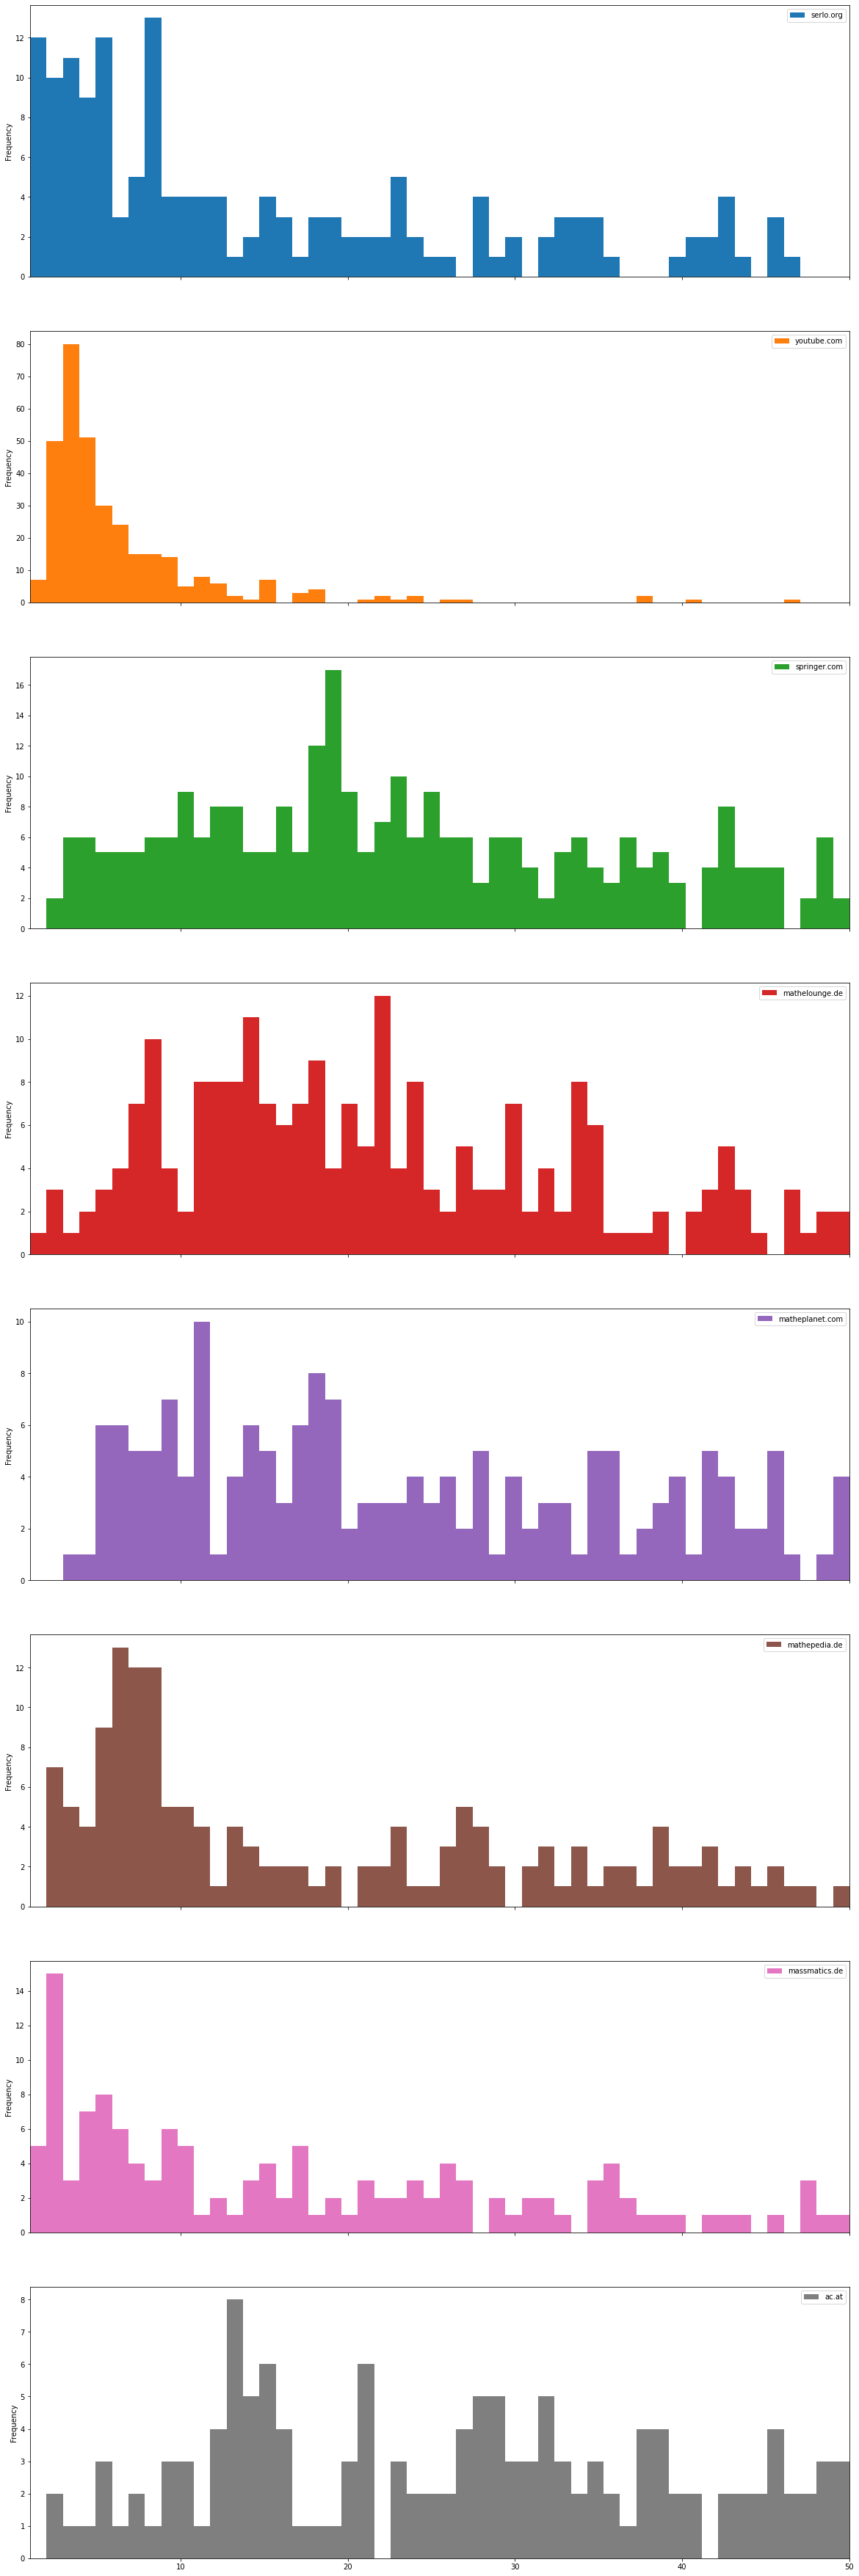

In [112]:
analyse(query={"scope": "hochschule", "language": "de"}, blacklist=["wikipedia.org"], no_domains=7)

# Auswertung: Schulmathematik

## Auswertung (scope: schule, subject: Mathe)

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 7 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

* youtube.com
* mathebibel.de
* lernhelfer.de
* kapiert.de
* studienkreis.de
* gut-erklaert.de
* frustfrei-lernen.de

Bei der Analyse der weiteren Webseiten wurde ausgeschlossen

* wikipedia.org

### Tabelle

,serlo.org,youtube.com,mathebibel.de,lernhelfer.de,kapiert.de,studienkreis.de,gut-erklaert.de,frustfrei-lernen.de
keyword,,,,,,,,
bruchgleichung,8.0,1.0,4.0,19.0,10.0,11.0,3.0,9.0
substitution,2.0,1.0,9.0,NaN,NaN,NaN,NaN,13.0
linearfaktorzerlegung durchführen,1.0,4.0,NaN,NaN,NaN,NaN,37.0,NaN
symmetrisches trapez,1.0,4.0,2.0,16.0,6.0,NaN,NaN,NaN
partialbruchzerlegung,7.0,3.0,2.0,16.0,NaN,NaN,NaN,NaN


### Deskriptive Auswertung

,serlo.org,youtube.com,mathebibel.de,lernhelfer.de,kapiert.de,studienkreis.de,gut-erklaert.de,frustfrei-lernen.de
count,301.000000,272.000000,197.000000,183.000000,149.000000,145.000000,140.000000,154.000000
mean,5.870432,6.216912,8.289340,19.207650,13.328859,13.579310,11.364286,13.220779
std,6.615121,6.813326,8.993906,11.005021,11.565584,12.414524,10.557967,11.398456
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,3.000000,11.500000,4.000000,4.000000,5.000000,6.000000
50%,4.000000,4.000000,5.000000,18.000000,10.000000,10.000000,8.000000,8.000000
75%,7.000000,7.000000,9.000000,25.000000,18.000000,18.000000,14.000000,17.750000
max,50.000000,47.000000,49.000000,48.000000,50.000000,49.000000,50.000000,49.000000


### Historgramme

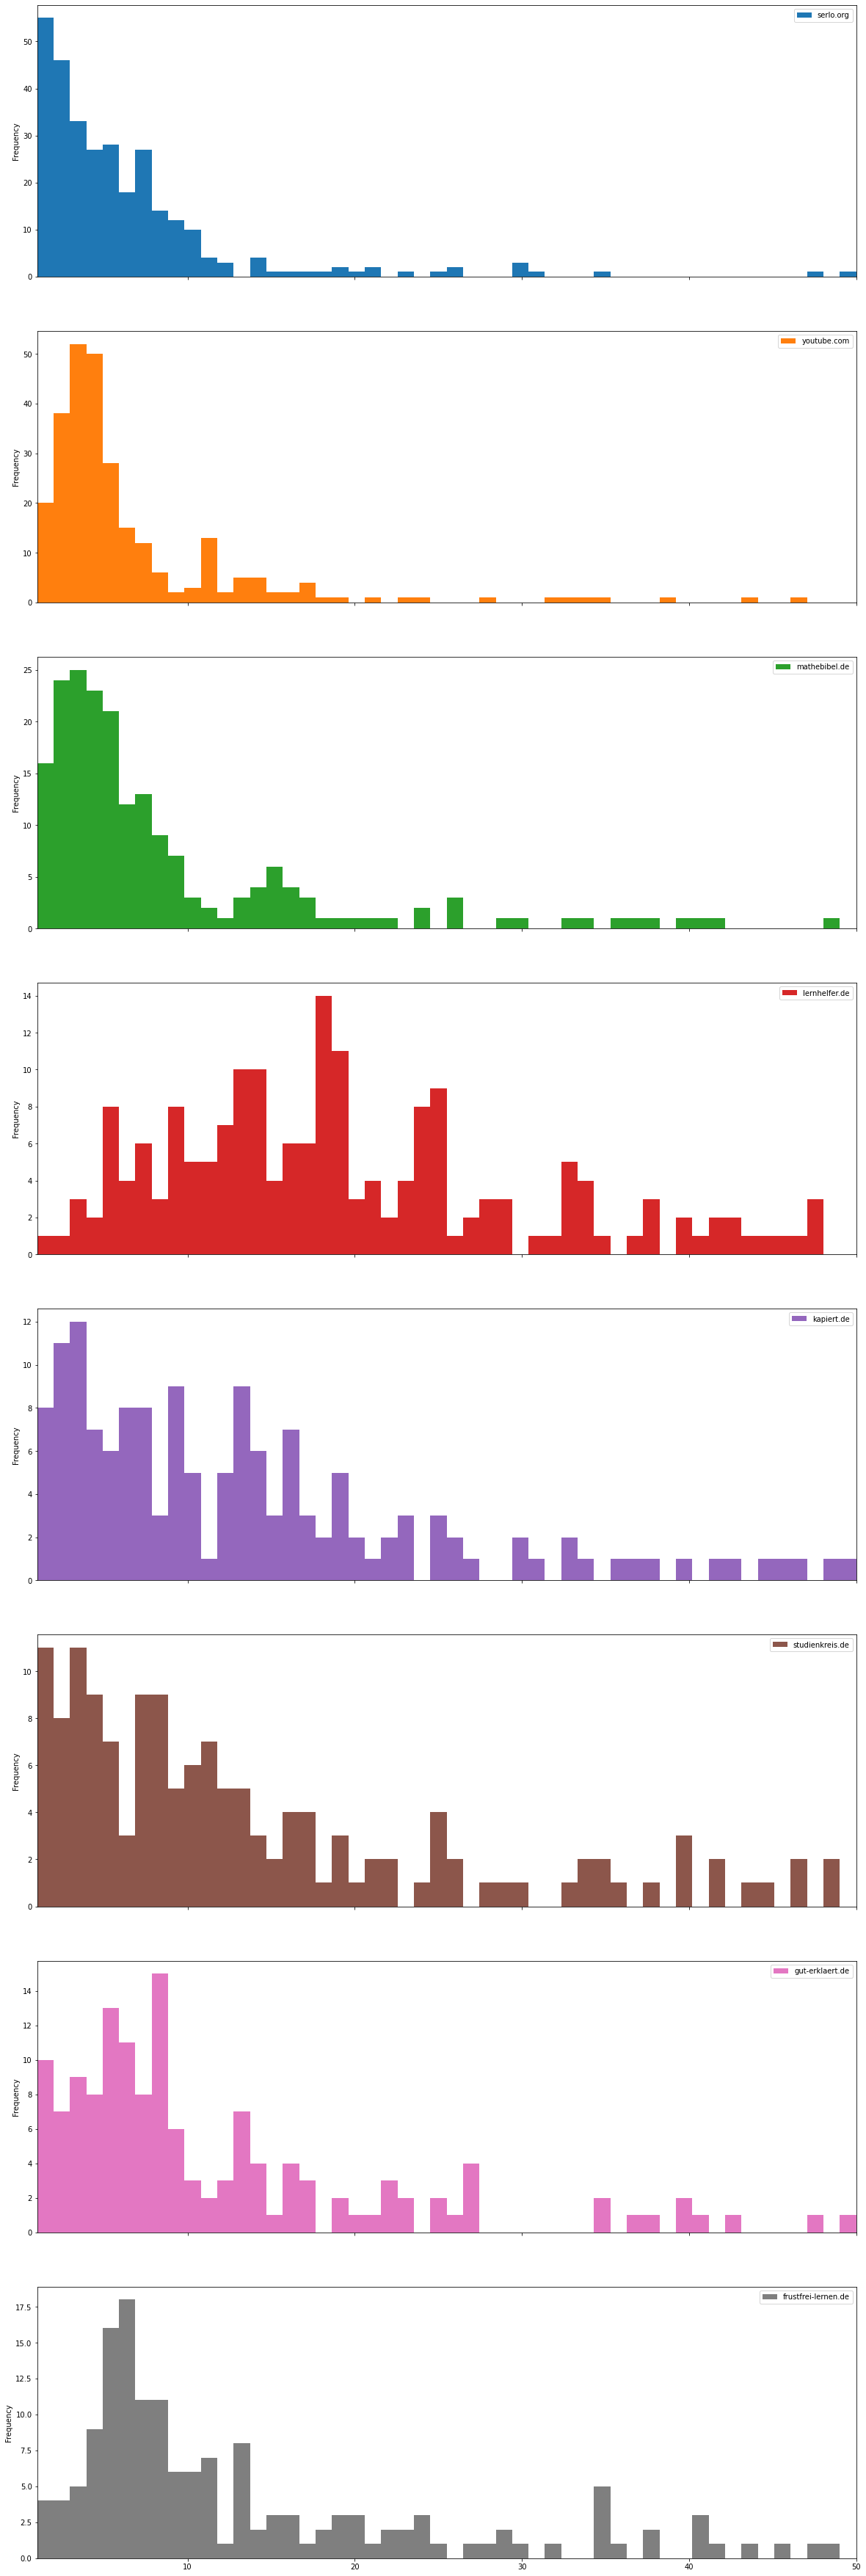

In [113]:
analyse(query={"scope": "schule", "subject": "Mathe"}, blacklist=["wikipedia.org"], no_domains=7)